## Business problem

# Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import pandas_profiling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import catboost
from catboost import CatBoostClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,confusion_matrix,roc_curve,auc,plot_roc_curve
plt.style.use('ggplot')
#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Moudles related to feature selection
from sklearn.feature_selection import RFE,SelectKBest,f_classif
#Modules related key techniques of supervised learning 
import statsmodels.formula.api as smf

## Create UDFs

In [2]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

## Import Data

In [3]:
df=pd.read_csv('E:/DataTrained/Practice_projects/red-wine-quality/winequality-red.csv')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [4]:
# profiling using pandas profiling
#report = pandas_profiling.ProfileReport(df)
#report

## Data Inspection

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# from pandas profiling the Density feature has very low Coefficient of variation so i will drop it.
df=df.drop(columns='density')

In [7]:
# Check duplicates in data
df.duplicated().sum()

240

In [8]:
# Remove duplictes
df.drop_duplicates(inplace=True)

In [9]:
# Reset index after removing duplicated records
df=df.reset_index()

In [10]:
df

index  fixed acidity  volatile acidity  citric acid  residual sugar  \
0         0            7.4             0.700         0.00             1.9   
1         1            7.8             0.880         0.00             2.6   
2         2            7.8             0.760         0.04             2.3   
3         3           11.2             0.280         0.56             1.9   
4         5            7.4             0.660         0.00             1.8   
...     ...            ...               ...          ...             ...   
1354   1593            6.8             0.620         0.08             1.9   
1355   1594            6.2             0.600         0.08             2.0   
1356   1595            5.9             0.550         0.10             2.2   
1357   1597            5.9             0.645         0.12             2.0   
1358   1598            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide    pH  sulphates  \
0         0.076                 11.0                  34.0  3.51       0.56   
1         0.098                 25.0                  67.0  3.20       0.68   
2         0.092                 15.0                  54.0  3.26       0.65   
3         0.075                 17.0                  60.0  3.16       0.58   
4         0.075                 13.0                  40.0  3.51       0.56   
...         ...                  ...                   ...   ...        ...   
1354      0.068                 28.0                  38.0  3.42       0.82   
1355      0.090                 32.0                  44.0  3.45       0.58   
1356      0.062                 39.0                  51.0  3.52       0.76   
1357      0.075                 32.0                  44.0  3.57       0.71   
1358      0.067                 18.0                  42.0  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1354      9.5        6  
1355     10.5        5  
1356     11.2        6  
1357     10.2        5  
1358     11.0        6  

[1359 rows x 12 columns]

In [11]:
# Remove the added column {index}
df.drop(columns='index',inplace=True)

In [12]:
# Check null values in data
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

###### There are null values in data.

In [13]:
# Check the counts for Quality feature
df.quality.value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

###### There are imbalance in the data

In [14]:
#separating the dependent and independent variable for balancing the class
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [15]:
x.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide    pH  sulphates  alcohol  
0                 11.0                  34.0  3.51       0.56      9.4  
1                 25.0                  67.0  3.20       0.68      9.8  
2                 15.0                  54.0  3.26       0.65      9.8  
3                 17.0                  60.0  3.16       0.58      9.8  
4                 13.0                  40.0  3.51       0.56      9.4

In [16]:
# importing smote for balancing the dataset

from imblearn.over_sampling import SMOTE
smt=SMOTE()
train_x,train_y=smt.fit_resample(x,y)
train_y.value_counts()

5    577
6    577
7    577
4    577
8    577
3    577
Name: quality, dtype: int64

In [17]:
train_y.shape

(3462,)

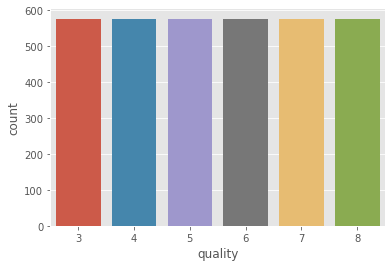

In [18]:
sns.countplot(train_y)
plt.show()

In [19]:
x=train_x
y=train_y

In [20]:
# Creating the dataframe with our balanced datadset

df_new=pd.DataFrame(data=x)
df_new['quality']=y
df=df_new
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          7.400000          0.700000     0.000000        1.900000   0.076000   
1          7.800000          0.880000     0.000000        2.600000   0.098000   
2          7.800000          0.760000     0.040000        2.300000   0.092000   
3         11.200000          0.280000     0.560000        1.900000   0.075000   
4          7.400000          0.660000     0.000000        1.800000   0.075000   
...             ...               ...          ...             ...        ...   
3457       9.639709          0.305327     0.530702        3.758835   0.078136   
3458      10.509370          0.342668     0.534399        2.629328   0.071466   
3459       7.697474          0.351076     0.338672        1.948737   0.074892   
3460       7.492175          0.348783     0.342522        1.720870   0.062461   
3461       6.148883          0.383236     0.308933        1.977022   0.065285   

      free sulfur dioxide  total sulfur dioxide        pH  sulphates  \
0               11.000000             34.000000  3.510000   0.560000   
1               25.000000             67.000000  3.200000   0.680000   
2               15.000000             54.000000  3.260000   0.650000   
3               17.000000             60.000000  3.160000   0.580000   
4               13.000000             40.000000  3.510000   0.560000   
...                   ...                   ...       ...        ...   
3457             5.733657             15.934628  3.171307   0.893366   
3458             5.146638             16.146638  3.150000   0.689592   
3459            15.363893             22.958841  3.226614   0.732722   
3460             3.626089             12.791304  3.255044   1.014434   
3461            24.284860             55.514637  3.549965   0.714725   

        alcohol  quality  
0      9.400000        5  
1      9.800000        5  
2      9.800000        5  
3      9.800000        6  
4      9.400000        5  
...         ...      ...  
3457  11.939709        8  
3458  11.102647        8  
3459  11.444621        8  
3460  10.354784        8  
3461  13.494492        8  

[3462 rows x 11 columns]

In [21]:
# set an arbitrary cutoff for (wine quality): 7 or higher getting classified as '1' and the remainder as '0'.
df['quality']=df.quality.map(lambda x:1 if x>6 else 0)

In [22]:
df.quality.value_counts(normalize=True)

0    0.666667
1    0.333333
Name: quality, dtype: float64

In [23]:
#df['quality']=df['quality'].astype('object')

In [24]:
# Let's rename the columns which contain spaces in their names and replace the spaces with underscores.
df.rename(columns={'fixed acidity':'fixed_acidity', 'volatile acidity':'volatile_acidity', 'citric acid':'citric_acid',
           'residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide', 
           'total sulfur dioxide':'total_sulfur_dioxide'},inplace=True)
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [25]:
# Select only the numerical features which is all the independent data.
cont_vars = df.select_dtypes(include = ['float64'])

In [26]:
cont_vars.apply(continuous_var_summary).round(1)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
N              3462.0            3462.0       3462.0          3462.0   
NMISS             0.0               0.0          0.0             0.0   
SUM           28899.7            2011.8        951.8          8993.0   
MEAN              8.3               0.6          0.3             2.6   
MEDIAN            8.0               0.5          0.3             2.2   
STD               1.6               0.2          0.2             1.2   
VAR               2.7               0.1          0.0             1.5   
MIN               4.6               0.1          0.0             0.9   
P1                5.2               0.2          0.0             1.3   
P5                6.1               0.3          0.0             1.6   
P10               6.6               0.3          0.0             1.7   
P25               7.2               0.4          0.1             1.9   
P50               8.0               0.5          0.3             2.2   
P75               9.3               0.7          0.4             2.8   
P90              10.6               0.9          0.5             4.0   
P95              11.3               1.0          0.6             5.1   
P99              12.7               1.4          0.7             6.7   
MAX              15.9               1.6          1.0            15.5   

        chlorides  free_sulfur_dioxide  total_sulfur_dioxide       pH  \
N          3462.0               3462.0                3462.0   3462.0   
NMISS         0.0                  0.0                   0.0      0.0   
SUM         307.8              46935.3              128792.1  11521.5   
MEAN          0.1                 13.6                  37.2      3.3   
MEDIAN        0.1                 11.0                  28.0      3.3   
STD           0.0                  9.7                  28.7      0.2   
VAR           0.0                 93.9                 824.8      0.0   
MIN           0.0                  1.0                   6.0      2.7   
P1            0.0                  3.0                   8.0      3.0   
P5            0.1                  3.9                  10.1      3.1   
P10           0.1                  4.8                  12.0      3.2   
P25           0.1                  6.0                  15.3      3.2   
P50           0.1                 11.0                  28.0      3.3   
P75           0.1                 18.0                  48.3      3.4   
P90           0.1                 28.0                  78.8      3.5   
P95           0.2                 33.0                  94.0      3.6   
P99           0.3                 42.0                 133.4      3.7   
MAX           0.6                 72.0                 289.0      4.0   

        sulphates  alcohol  
N          3462.0   3462.0  
NMISS         0.0      0.0  
SUM        2302.0  37124.1  
MEAN          0.7     10.7  
MEDIAN        0.6     10.5  
STD           0.2      1.2  
VAR           0.0      1.4  
MIN           0.3      8.4  
P1            0.4      8.7  
P5            0.5      9.2  
P10           0.5      9.3  
P25           0.6      9.8  
P50           0.6     10.5  
P75           0.8     11.5  
P90           0.8     12.5  
P95           0.9     13.0  
P99           1.2     13.7  
MAX           2.0     14.9

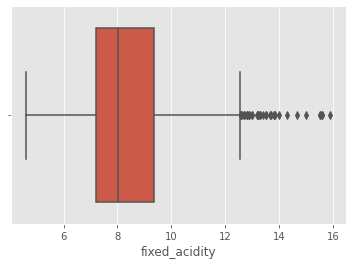

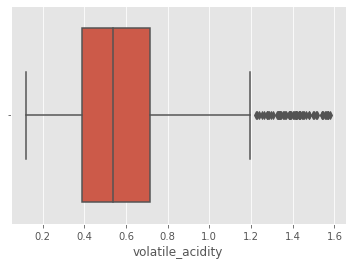

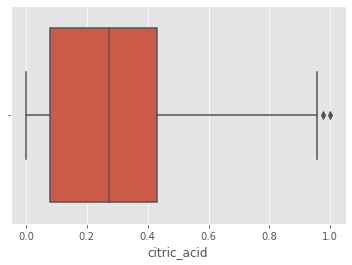

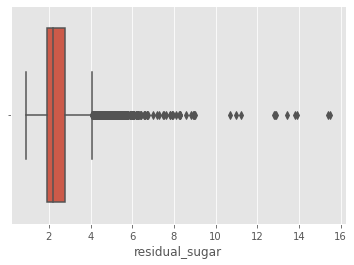

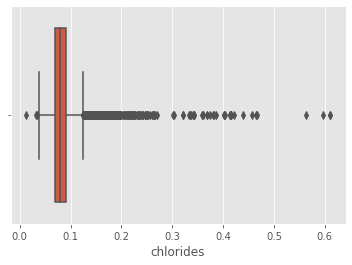

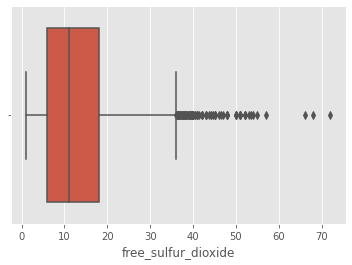

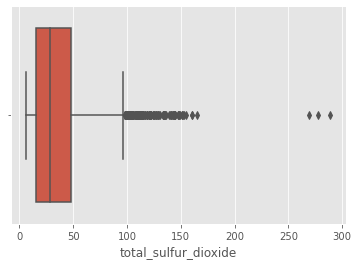

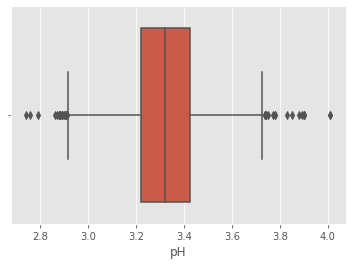

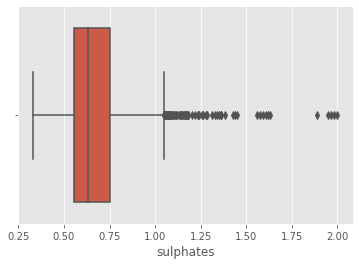

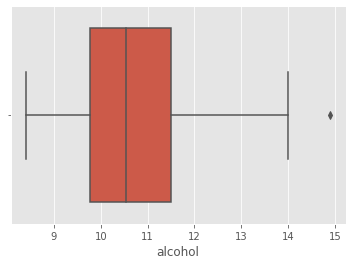

In [27]:
# Outlier treatment 
for col in cont_vars.columns:
    sns.boxplot(cont_vars[col])
    plt.show()

In [28]:
# p.cut technique for removing 0.01 in both tails
cont_vars = cont_vars.apply(lambda x: x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))

In [29]:
cont_vars.apply(continuous_var_summary).round(2)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
N             3462.00           3462.00      3462.00         3462.00   
NMISS            0.00              0.00         0.00            0.00   
SUM          28871.05           2010.04       949.69         8895.69   
MEAN             8.34              0.58         0.27            2.57   
MEDIAN           8.02              0.54         0.27            2.20   
STD              1.60              0.24         0.20            1.05   
VAR              2.56              0.06         0.04            1.10   
MIN              5.20              0.22         0.00            1.35   
P1               5.20              0.22         0.00            1.35   
P5               6.05              0.29         0.00            1.58   
P10              6.60              0.32         0.02            1.70   
P25              7.20              0.39         0.08            1.92   
P50              8.02              0.54         0.27            2.20   
P75              9.34              0.72         0.43            2.77   
P90             10.59              0.91         0.54            4.02   
P95             11.34              1.04         0.61            5.09   
P99             12.70              1.38         0.70            6.70   
MAX             12.70              1.38         0.70            6.70   

        chlorides  free_sulfur_dioxide  total_sulfur_dioxide        pH  \
N         3462.00              3462.00               3462.00   3462.00   
NMISS        0.00                 0.00                  0.00      0.00   
SUM        304.27             46655.94             127990.35  11520.76   
MEAN         0.09                13.48                 36.97      3.33   
MEDIAN       0.08                11.00                 28.00      3.32   
STD          0.04                 9.38                 27.55      0.15   
VAR          0.00                88.06                758.75      0.02   
MIN          0.04                 3.00                  8.00      2.96   
P1           0.04                 3.00                  8.00      2.96   
P5           0.05                 3.92                 10.08      3.10   
P10          0.06                 4.84                 12.00      3.15   
P25          0.07                 6.00                 15.28      3.22   
P50          0.08                11.00                 28.00      3.32   
P75          0.09                18.00                 48.32      3.43   
P90          0.12                28.00                 78.77      3.53   
P95          0.16                33.00                 93.97      3.58   
P99          0.30                42.00                133.15      3.69   
MAX          0.30                42.00                133.39      3.69   

        sulphates   alcohol  
N         3462.00   3462.00  
NMISS        0.00      0.00  
SUM       2293.81  37122.55  
MEAN         0.66     10.72  
MEDIAN       0.63     10.53  
STD          0.15      1.19  
VAR          0.02      1.42  
MIN          0.42      8.73  
P1           0.42      8.73  
P5           0.47      9.19  
P10          0.50      9.33  
P25          0.55      9.76  
P50          0.63     10.53  
P75          0.75     11.50  
P90          0.85     12.49  
P95          0.92     13.00  
P99          1.18     13.73  
MAX          1.18     13.74

In [30]:
# Check the skewness
cont_vars.skew()

fixed_acidity           0.556539
volatile_acidity        0.969304
citric_acid             0.200087
residual_sugar          1.897591
chlorides               3.126389
free_sulfur_dioxide     1.107691
total_sulfur_dioxide    1.382842
pH                      0.099729
sulphates               0.956823
alcohol                 0.570483
dtype: float64

In [31]:
#removing the skewness

from sklearn.preprocessing import power_transform
x_new=power_transform(cont_vars)
x=pd.DataFrame(x_new,columns=cont_vars.columns)
x.skew()

fixed_acidity           0.005294
volatile_acidity        0.074993
citric_acid             0.003198
residual_sugar          0.098793
chlorides               0.121297
free_sulfur_dioxide     0.046599
total_sulfur_dioxide    0.047105
pH                      0.000214
sulphates               0.046674
alcohol                 0.058265
dtype: float64

In [32]:
# Concatenating the x and y
df_final = pd.concat([x, df.quality],axis=1)

In [33]:
df_final

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0         -0.525430          0.695653    -1.483296       -0.714947  -0.172121   
1         -0.242740          1.257340    -1.483296        0.438306   0.770997   
2         -0.242740          0.901604    -1.228822        0.032668   0.556456   
3          1.625534         -1.619835     1.373002       -0.714947  -0.226626   
4         -0.525430          0.546120    -1.483296       -0.953325  -0.226626   
...             ...               ...          ...             ...        ...   
3457       0.867213         -1.416315     1.252511        1.353552  -0.059629   
3458       1.306756         -1.136466     1.267848        0.472682  -0.429065   
3459      -0.313548         -1.076552     0.397337       -0.607415  -0.232561   
3460      -0.458724         -1.092785     0.415719       -1.160771  -1.021997   
3461      -1.539511         -0.857110     0.253456       -0.547403  -0.823251   

      free_sulfur_dioxide  total_sulfur_dioxide        pH  sulphates  \
0                0.076222              0.291586  1.212521  -0.667828   
1                1.230212              1.184696 -0.851382   0.300840   
2                0.526562              0.911860 -0.439260   0.085175   
3                0.703594              1.046415 -1.129702  -0.485260   
4                0.320750              0.514971  1.212521  -0.667828   
...                   ...                   ...       ...        ...   
3457            -0.910432             -0.826617 -1.050731   1.465957   
3458            -1.076877             -0.806090 -1.199736   0.366543   
3459             0.560686             -0.272412 -0.667796   0.644029   
3460            -1.615375             -1.172679 -0.473064   1.921274   
3461             1.191613              0.947427  1.467328   0.531684   

       alcohol  quality  
0    -1.218261        0  
1    -0.752111        0  
2    -0.752111        0  
3    -0.752111        0  
4    -1.218261        0  
...        ...      ...  
3457  1.058355        1  
3458  0.462098        1  
3459  0.720080        1  
3460 -0.184425        1  
3461  1.906935        1  

[3462 rows x 11 columns]

------------------------------------------------------------------------------------------------------------------------------

## EDA

### Univariate analysis

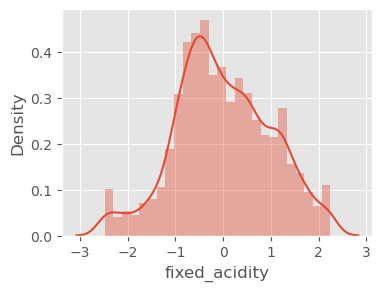

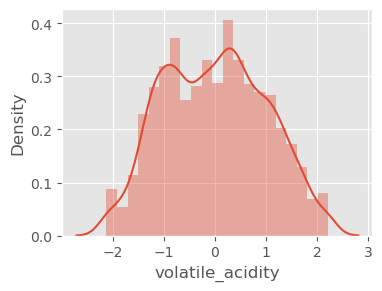

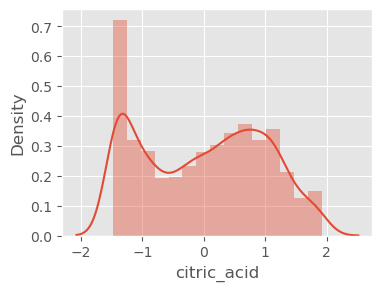

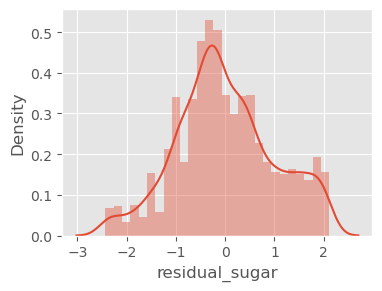

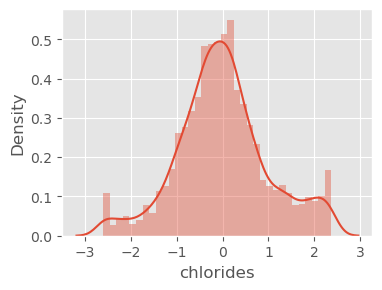

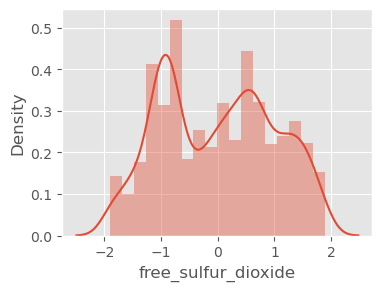

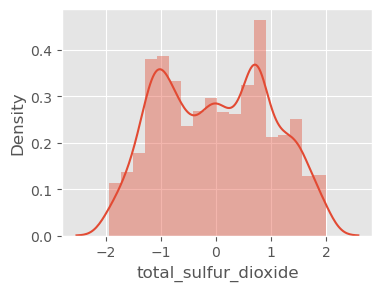

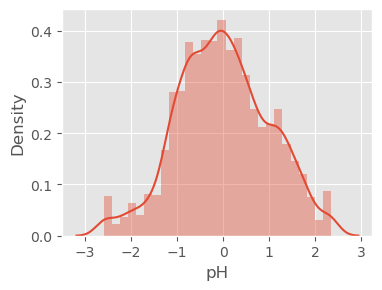

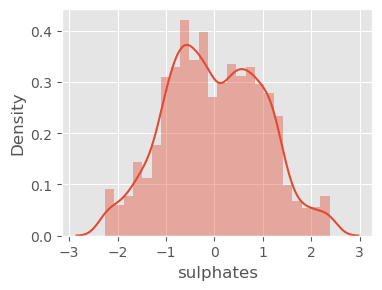

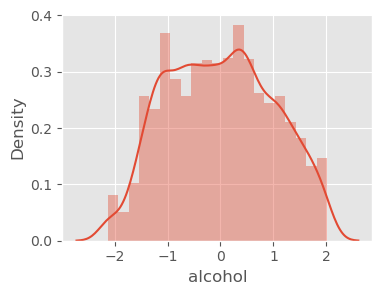

In [34]:
for col in x.columns:
    plt.figure(figsize=(4,3),dpi=100)
    sns.distplot(df_final[col])
    plt.show()

### Bivariate analysis

In [35]:
df_final[["fixed_acidity","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds")

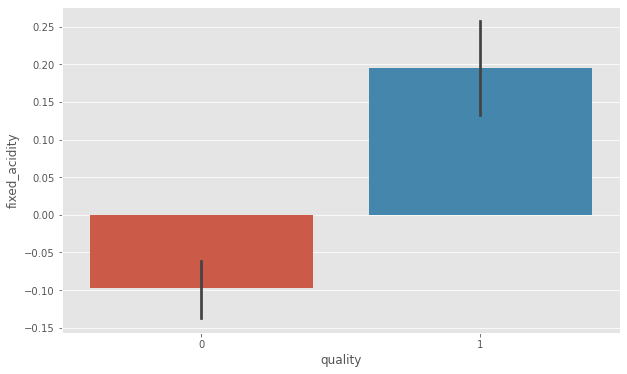

In [36]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed_acidity', data = df_final)
plt.show()

In [37]:
df_final[["volatile_acidity","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds")

In [38]:
df_final[["citric_acid","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds")

In [39]:
df_final[["residual_sugar","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds")

In [40]:
df_final[["volatile_acidity","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds")

In [41]:
df_final[["chlorides","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds")

In [42]:
df_final[["pH","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds")

In [43]:
df_final[["alcohol","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds")

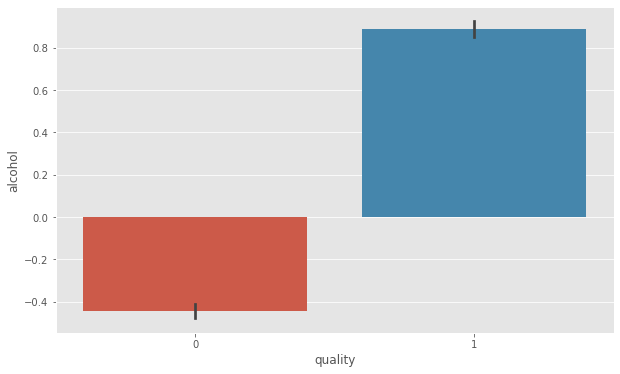

In [44]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df_final)
plt.show()

In [45]:
df_final[["sulphates","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds")

-------------------------------------------------------------------------------------------------------------------------------

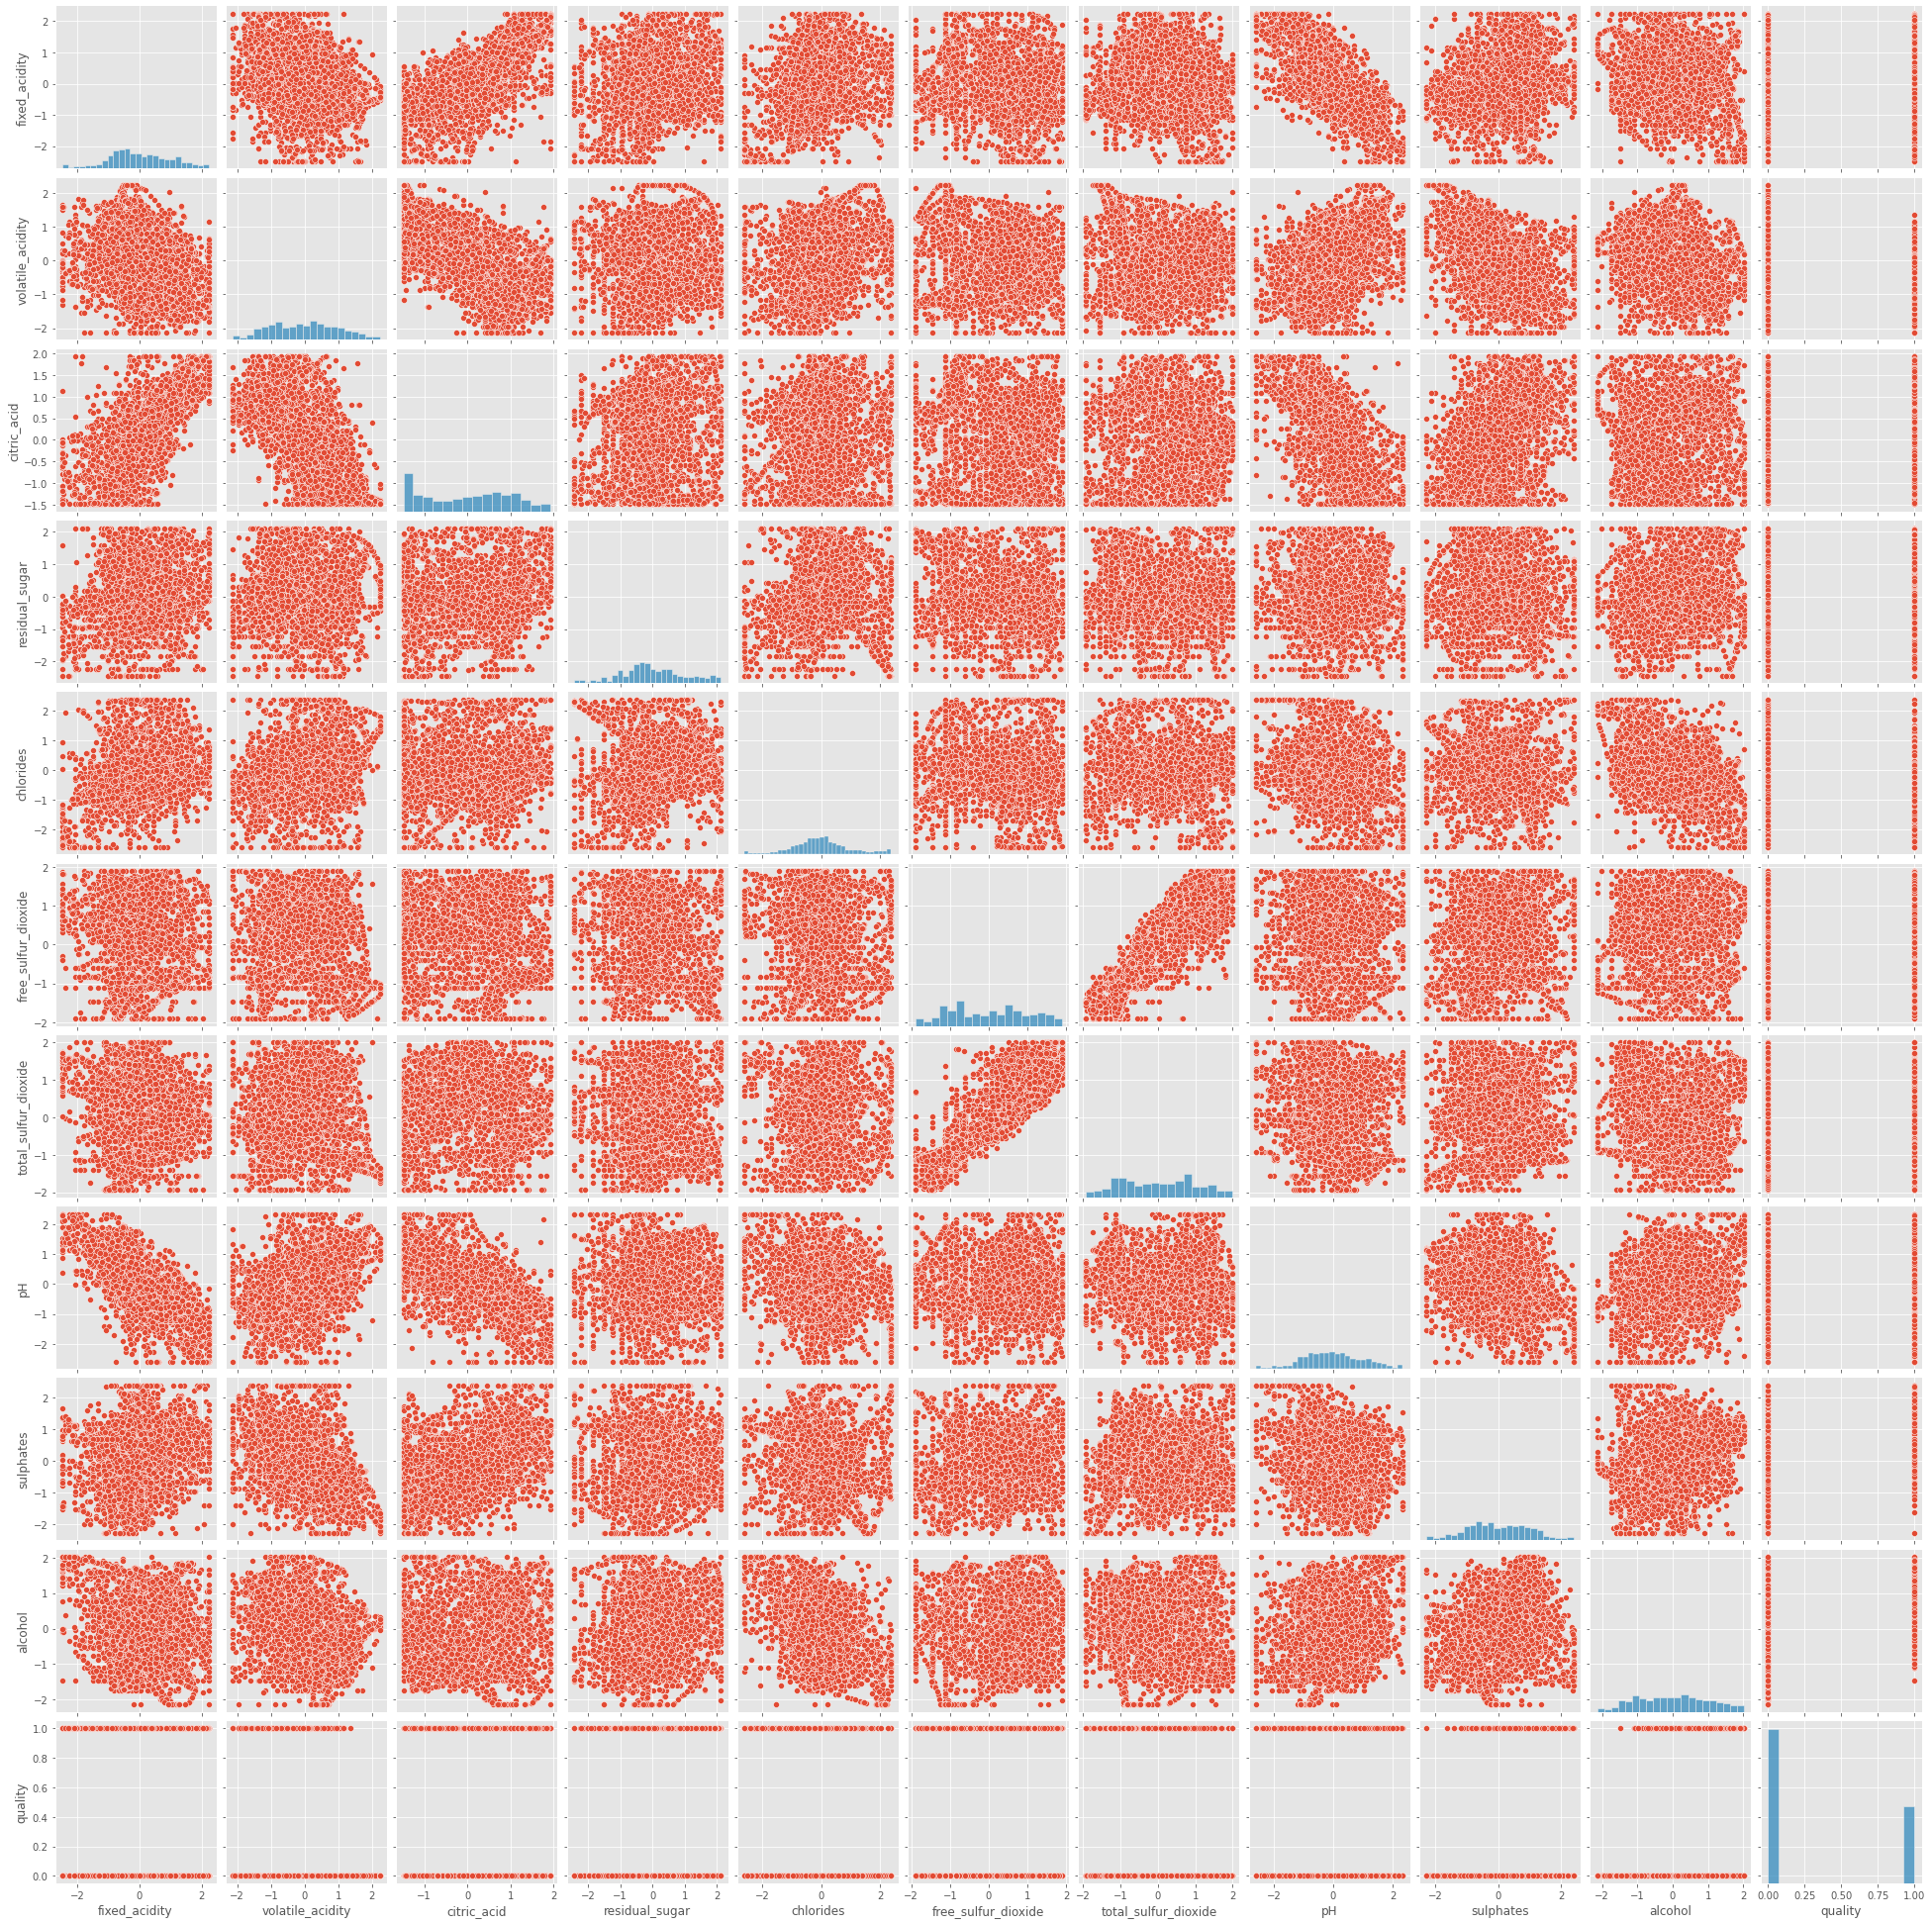

In [46]:
sns.pairplot(df_final)
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

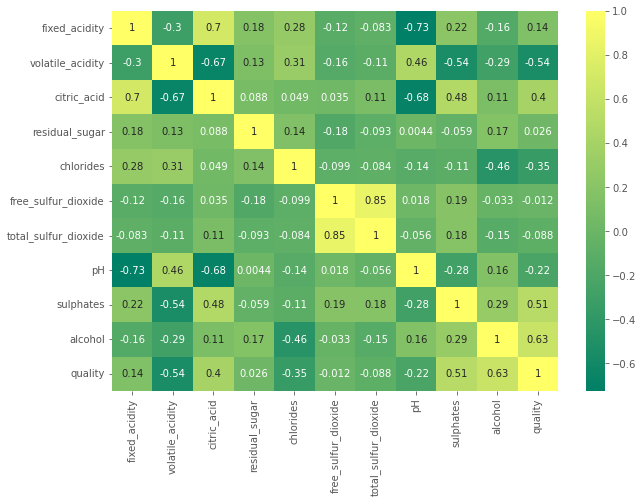

In [47]:
# heatmap
plt.figure(figsize = (10,7))
sns.heatmap(df_final.corr(), annot=True,cmap='summer')
plt.show()

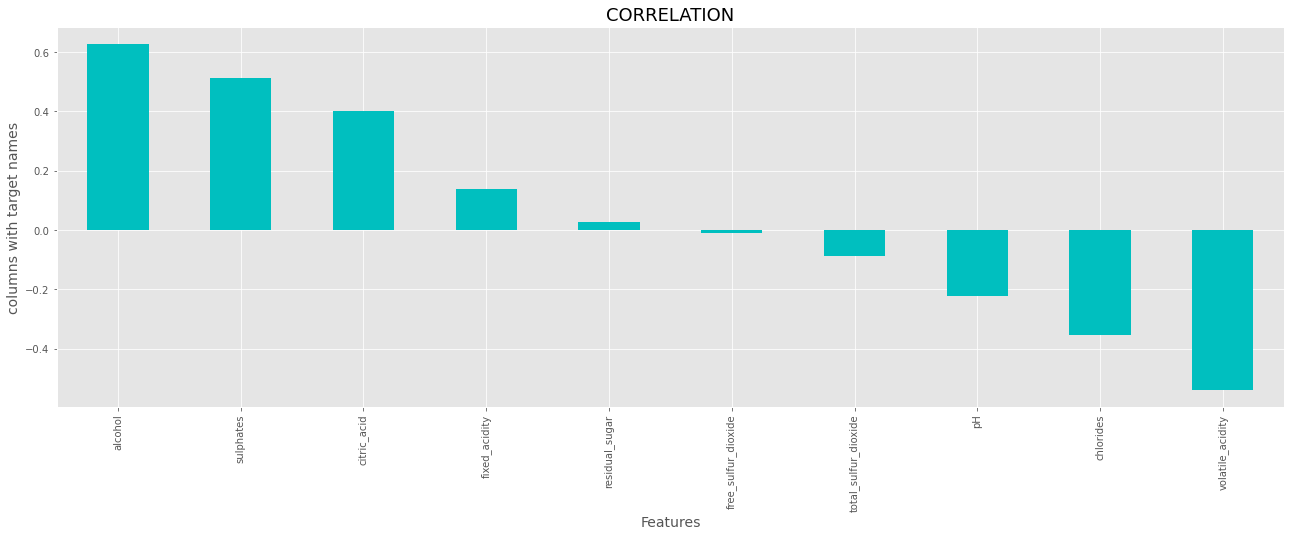

In [48]:
#checking the columns which are positively and negatively correlated

plt.figure(figsize=(22,7))
df_final.corr()['quality'].sort_values(ascending=False).drop(['quality']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('CORRELATION',fontsize=18)
plt.show()

In [49]:
# Insights from above plots

# --> Volitaile acidity have good negative correlation with target label(Quality.
# --> Alcohol have strong postive correlation with target label (Quality).
# --> The increase in citric acid positively affected the votes.
# --> The decrease in chlorides positively affects the votes cast.
# --> We can say that the decrease in pH affects the votes positively.
# --> Increasing both Sulphates & alcohol affects the votes positively..
# --> fixed acidity & pH have good negative correlation.
# --> free_sulfur_dioxide & total_sulfur_dioxidehave strong postive correlation.

-------------------------------------------------------------------------------------------------------------------------------

### Feature Reduction

### RFE

In [50]:
X = df_final[df_final.columns.difference(['quality'])]
y = df_final.quality

In [51]:
rfe = RFE(RandomForestClassifier(), n_features_to_select=8).fit(X,y)

In [52]:
l2_rfe = X.columns[rfe.get_support()]

In [53]:
l2_rfe

Index(['alcohol', 'chlorides', 'citric_acid', 'fixed_acidity',
       'free_sulfur_dioxide', 'sulphates', 'total_sulfur_dioxide',
       'volatile_acidity'],
      dtype='object')

### SKB

In [54]:
SKB = SelectKBest(f_classif, k=8).fit(X, y )

In [55]:
l3_skb = X.columns[SKB.get_support()]

In [56]:
l3_skb

Index(['alcohol', 'chlorides', 'citric_acid', 'fixed_acidity', 'pH',
       'sulphates', 'total_sulfur_dioxide', 'volatile_acidity'],
      dtype='object')

-------------------------------------------------------------------------------------------------------------------------------

In [57]:
list(set(list(l2_rfe)+list(l3_skb)))

['alcohol',
 'total_sulfur_dioxide',
 'fixed_acidity',
 'pH',
 'free_sulfur_dioxide',
 'volatile_acidity',
 'chlorides',
 'sulphates',
 'citric_acid']

-------------------------------------------------------------------------------------------------------------------------------

### VIF check Multicollinarity¶

In [59]:
final_list= ['alcohol',
 'total_sulfur_dioxide',
 'fixed_acidity',
 'pH',
 'free_sulfur_dioxide',
 'volatile_acidity',
 'chlorides',
 'sulphates',
 'citric_acid']

In [60]:
X_new = X[final_list]
y = y

In [61]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif["features"] = X_new.columns

In [62]:
vif.sort_values(by='VIF_Factor', ascending=False, inplace=True)
vif

VIF_Factor              features
1    4.391392  total_sulfur_dioxide
8    4.272008           citric_acid
4    4.091282   free_sulfur_dioxide
2    3.254483         fixed_acidity
5    2.867692      volatile_acidity
3    2.679582                    pH
0    1.690483               alcohol
6    1.601203             chlorides
7    1.594513             sulphates

-------------------------------------------------------------------------------------------------------------------------------

### Static Model

In [63]:
data_model = pd.concat([X_new, y], axis=1)

In [65]:
# split the data into train and test
train,test=train_test_split(data_model,test_size=0.25,random_state=1,shuffle=True)

In [66]:
print('train size: ',train.shape)
print('---------------------------')
print('test size: ',test.shape)

train size:  (2596, 10)
---------------------------
test size:  (866, 10)


In [69]:
 #Logistic Regression

eqn = 'quality~ '+'+'.join(X_new.columns.difference(['free_sulfur_dioxide']))

In [70]:
model_logit=smf.logit(eqn,data=train).fit()
print(model_logit.summary())

Optimization terminated successfully.
         Current function value: 0.238709
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                 2596
Model:                          Logit   Df Residuals:                     2587
Method:                           MLE   Df Model:                            8
Date:                Thu, 22 Dec 2022   Pseudo R-squ.:                  0.6263
Time:                        12:24:08   Log-Likelihood:                -619.69
converged:                       True   LL-Null:                       -1658.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.0688      0.116    -17.909      0.000      -2.295      -1.842

In [71]:
train_pred = model_logit.predict(train)
test_pred = model_logit.predict(test)

In [72]:
print('train_auc', roc_auc_score(train.quality, train_pred))
print('test_auc', roc_auc_score(test.quality, test_pred))

train_auc 0.9592246788764064
test_auc 0.9484824475865431


-------------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------

# ML Algos.

In [75]:
x=X_new
y=df_final.iloc[:,-1]

In [76]:
lr=LogisticRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.25)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(roc_auc_score(pred_train,y_train)*100,1)==round(roc_auc_score(y_test,pred_test)*100,1):
        print("At random state ",i," The model performs very well")
        print("At random_state: ",i)
        print("Training roc_auc_score is :-",round(roc_auc_score(y_train,pred_train)*100,1))
        print("Testing roc_auc_score is:-",round(roc_auc_score(y_test,pred_test)*100,1),  '\n\n')

At random state  28  The model performs very well
At random_state:  28
Training roc_auc_score is :- 90.3
Testing roc_auc_score is:- 89.6 


At random state  93  The model performs very well
At random_state:  93
Training roc_auc_score is :- 90.2
Testing roc_auc_score is:- 89.2 




##### Use random state=28

-------------------------------------------------------------------------------------------------------------------------------

##### Spliting the Data

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=28)

In [78]:
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

### Logistic regression

In [79]:
lr.fit(x_train_sc,y_train)
pred=lr.predict(x_test_sc)
score=roc_auc_score(y_test,pred)
print('Roc_Auc Score: ',score)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred))
print('Classification Report: ','\n',classification_report(y_test,pred))

Roc_Auc Score:  0.8961385304474844
Confusion Matrix:  
 [[534  49]
 [ 35 248]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       583
           1       0.84      0.88      0.86       283

    accuracy                           0.90       866
   macro avg       0.89      0.90      0.89       866
weighted avg       0.90      0.90      0.90       866



-------------------------------------------------------------------------------------------------------------------------------

##### CROSS VALIDATION for LR

In [82]:
for i in range(3,11):
    cvs=cross_val_score(lr,x,y,cv=i)
    cvs_mean=cvs.mean()
    print ("At cv:-",i)
    print ("Cross validation score is :-",cvs_mean*100)
    print ("Roc_Auc Score is :-",score*100)
    print ("\n")

At cv:- 3
Cross validation score is :- 89.83246678220681
Roc_Auc Score is :- 89.61385304474844


At cv:- 4
Cross validation score is :- 89.80846760736361
Roc_Auc Score is :- 89.61385304474844


At cv:- 5
Cross validation score is :- 89.92430498210847
Roc_Auc Score is :- 89.61385304474844


At cv:- 6
Cross validation score is :- 90.17908723281339
Roc_Auc Score is :- 89.61385304474844


At cv:- 7
Cross validation score is :- 89.89817200343516
Roc_Auc Score is :- 89.61385304474844


At cv:- 8
Cross validation score is :- 90.09721687622958
Roc_Auc Score is :- 89.61385304474844


At cv:- 9
Cross validation score is :- 90.21539802789805
Roc_Auc Score is :- 89.61385304474844


At cv:- 10
Cross validation score is :- 89.95185820659324
Roc_Auc Score is :- 89.61385304474844




###### I will go with cv=9 

--------------------------------------------------------------------------------------------------------------------------------

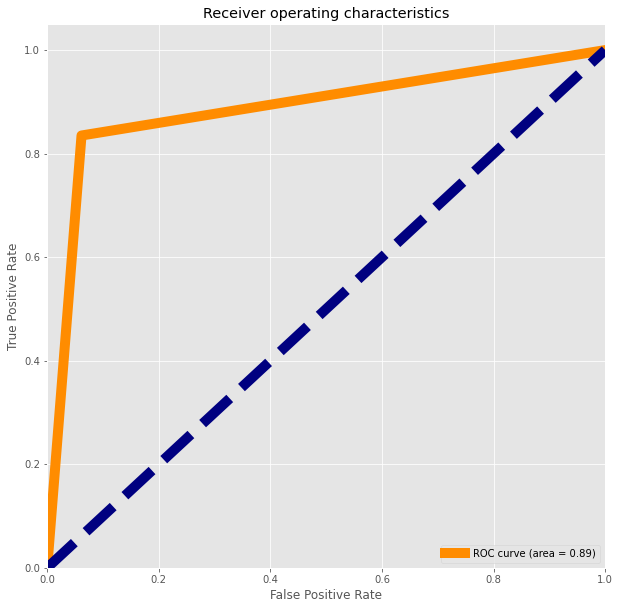

In [83]:
fpr,tpr,threshold=roc_curve(pred,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

### DTC

In [84]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train_sc,y_train)
pred=dtc.predict(x_test_sc)
score=roc_auc_score(y_test,pred)
print('Roc_Auc Score: ',score)
print('Confusion Matrix: ' ,'\n','\n',confusion_matrix(y_test,pred))
print('Classification Report: ','\n',classification_report(y_test,pred))
print('CV  : ',cross_val_score(dtc,x,y,cv=9).mean())

Roc_Auc Score:  0.9215250713683943
Confusion Matrix:  
 
 [[543  40]
 [ 25 258]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       583
           1       0.87      0.91      0.89       283

    accuracy                           0.92       866
   macro avg       0.91      0.92      0.92       866
weighted avg       0.93      0.92      0.93       866

CV  :  0.902727423039923


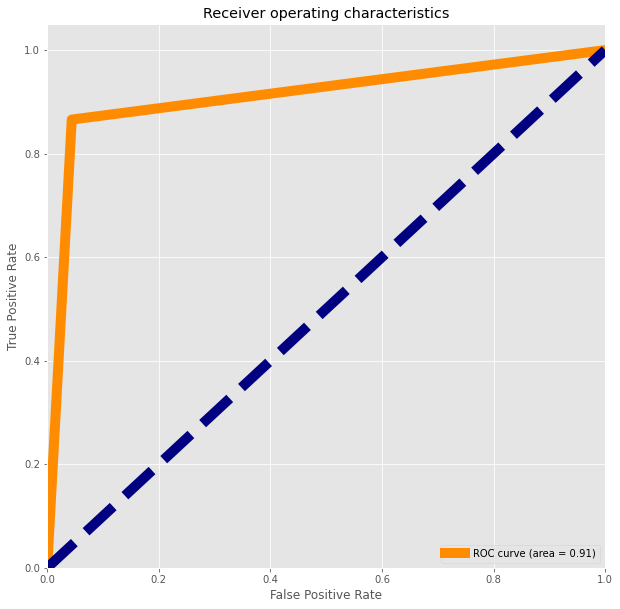

In [85]:
fpr,tpr,threshold=roc_curve(pred,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

### SVC

In [86]:
svc= SVC()
svc.fit(x_train_sc,y_train)
pred=svc.predict(x_test_sc)
score=roc_auc_score(y_test,pred)
print('Roc_Auc Score: ',score)
print('Confusion Matrix: ' ,'\n','\n',confusion_matrix(y_test,pred))
print('Classification Report: ','\n',classification_report(y_test,pred))
print('CV  : ',cross_val_score(dtc,x,y,cv=9).mean())

Roc_Auc Score:  0.9066361999890902
Confusion Matrix:  
 
 [[538  45]
 [ 31 252]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       583
           1       0.85      0.89      0.87       283

    accuracy                           0.91       866
   macro avg       0.90      0.91      0.90       866
weighted avg       0.91      0.91      0.91       866

CV  :  0.9033016173641174


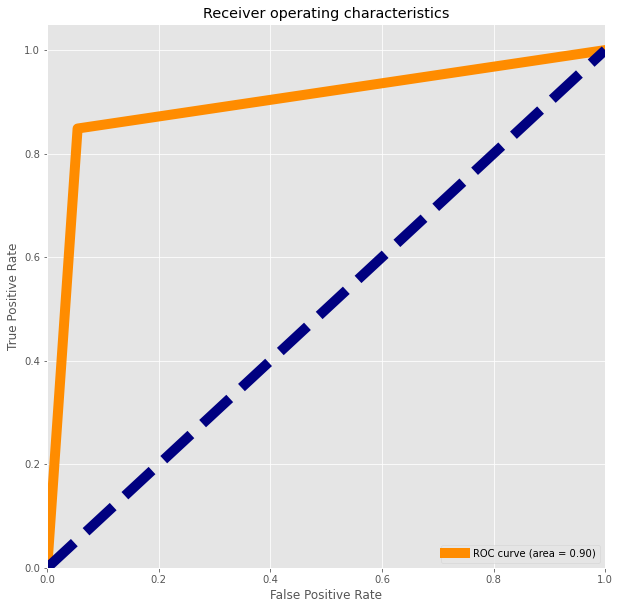

In [87]:
fpr,tpr,threshold=roc_curve(pred,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

## Ensembles Techniques

### Random Forest Classifier

In [88]:
rfc= RandomForestClassifier()
rfc.fit(x_train_sc,y_train)
pred=rfc.predict(x_test_sc)
score=roc_auc_score(y_test,pred)
print('Roc_Auc Score: ',score)
print('Confusion Matrix: ' ,'\n','\n',confusion_matrix(y_test,pred))
print('Classification Report: ','\n',classification_report(y_test,pred))
print('CV  : ',cross_val_score(rfc,x,y,cv=9).mean())

Roc_Auc Score:  0.9337895253622969
Confusion Matrix:  
 
 [[547  36]
 [ 20 263]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       583
           1       0.88      0.93      0.90       283

    accuracy                           0.94       866
   macro avg       0.92      0.93      0.93       866
weighted avg       0.94      0.94      0.94       866

CV  :  0.9281340187590187


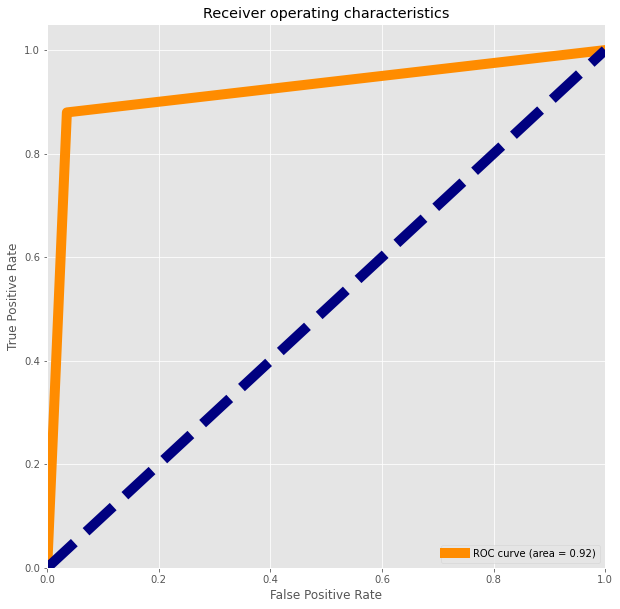

In [89]:
fpr,tpr,threshold=roc_curve(pred,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

#### Area under the curve is 92% which is good

-------------------------------------------------------------------------------------------------------------------------------

### GBC

In [90]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train_sc,y_train)
pred=gbc.predict(x_test_sc)
score=roc_auc_score(y_test,pred)
print('Roc_Auc Score: ',score)
print('Confusion Matrix: ' ,'\n','\n',confusion_matrix(y_test,pred))
print('Classification Report: ','\n',classification_report(y_test,pred))
print('CV  : ',cross_val_score(gbc,x,y,cv=9).mean())

Roc_Auc Score:  0.9277345762444769
Confusion Matrix:  
 
 [[542  41]
 [ 21 262]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       583
           1       0.86      0.93      0.89       283

    accuracy                           0.93       866
   macro avg       0.91      0.93      0.92       866
weighted avg       0.93      0.93      0.93       866

CV  :  0.9168748496873496


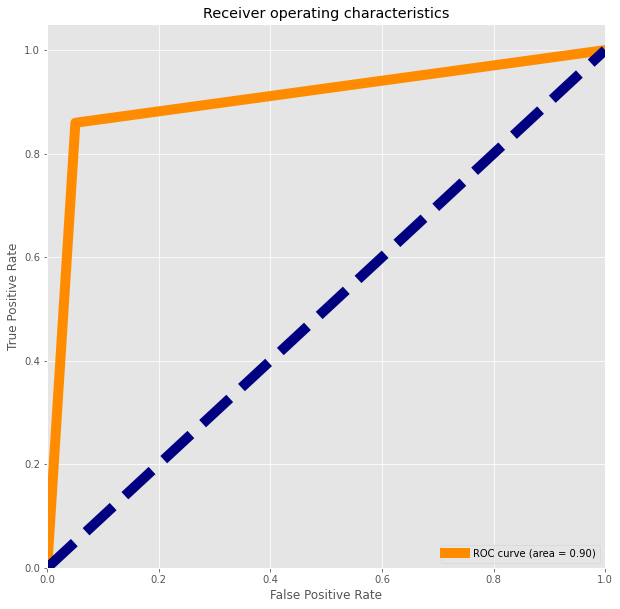

In [151]:
fpr,tpr,threshold=roc_curve(pred,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

### XGBOOST

In [91]:
xgb= XGBClassifier()
xgb.fit(x_train_sc,y_train)
pred=xgb.predict(x_test_sc)
score=roc_auc_score(y_test,pred)
print('Roc_Auc Score: ',score)
print('Confusion Matrix: ' ,'\n','\n',confusion_matrix(y_test,pred))
print('Classification Report: ','\n',classification_report(y_test,pred))
print('CV  : ',cross_val_score(xgb,x,y,cv=9).mean())

Roc_Auc Score:  0.942623447623781
Confusion Matrix:  
 
 [[547  36]
 [ 15 268]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       583
           1       0.88      0.95      0.91       283

    accuracy                           0.94       866
   macro avg       0.93      0.94      0.93       866
weighted avg       0.94      0.94      0.94       866

CV  :  0.9298633658008657


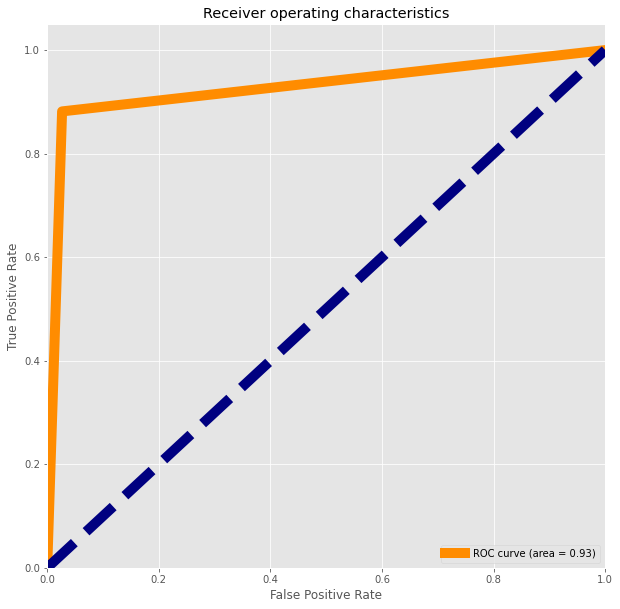

In [92]:
fpr,tpr,threshold=roc_curve(pred,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

### CATBOOST Classifier

In [93]:
cbc= CatBoostClassifier()
cbc.fit(x_train_sc,y_train)
pred=cbc.predict(x_test_sc)
score=roc_auc_score(y_test,pred)
print('Roc_Auc Score: ',score)
print('Confusion Matrix: ' ,'\n','\n',confusion_matrix(y_test,pred))
print('Classification Report: ','\n',classification_report(y_test,pred))
print('CV  : ',cross_val_score(cbc,x,y,cv=9).mean())

Learning rate set to 0.015483
0:	learn: 0.6744284	total: 265ms	remaining: 4m 24s
1:	learn: 0.6544319	total: 271ms	remaining: 2m 15s
2:	learn: 0.6364553	total: 276ms	remaining: 1m 31s
3:	learn: 0.6183909	total: 282ms	remaining: 1m 10s
4:	learn: 0.6006805	total: 287ms	remaining: 57.2s
5:	learn: 0.5834018	total: 293ms	remaining: 48.5s
6:	learn: 0.5701604	total: 298ms	remaining: 42.3s
7:	learn: 0.5556714	total: 303ms	remaining: 37.6s
8:	learn: 0.5413088	total: 309ms	remaining: 34s
9:	learn: 0.5285726	total: 315ms	remaining: 31.1s
10:	learn: 0.5160789	total: 320ms	remaining: 28.8s
11:	learn: 0.5033931	total: 328ms	remaining: 27s
12:	learn: 0.4917699	total: 334ms	remaining: 25.3s
13:	learn: 0.4824561	total: 339ms	remaining: 23.9s
14:	learn: 0.4723843	total: 350ms	remaining: 23s
15:	learn: 0.4625889	total: 356ms	remaining: 21.9s
16:	learn: 0.4532284	total: 362ms	remaining: 20.9s
17:	learn: 0.4433788	total: 367ms	remaining: 20s
18:	learn: 0.4341312	total: 372ms	remaining: 19.2s
19:	learn: 0.42

189:	learn: 0.1609032	total: 1.36s	remaining: 5.8s
190:	learn: 0.1606225	total: 1.37s	remaining: 5.79s
191:	learn: 0.1603747	total: 1.37s	remaining: 5.78s
192:	learn: 0.1600669	total: 1.38s	remaining: 5.76s
193:	learn: 0.1597924	total: 1.38s	remaining: 5.75s
194:	learn: 0.1595470	total: 1.39s	remaining: 5.73s
195:	learn: 0.1589935	total: 1.4s	remaining: 5.72s
196:	learn: 0.1585060	total: 1.4s	remaining: 5.71s
197:	learn: 0.1581811	total: 1.41s	remaining: 5.7s
198:	learn: 0.1577488	total: 1.41s	remaining: 5.69s
199:	learn: 0.1574712	total: 1.42s	remaining: 5.68s
200:	learn: 0.1571248	total: 1.43s	remaining: 5.67s
201:	learn: 0.1567895	total: 1.43s	remaining: 5.65s
202:	learn: 0.1564287	total: 1.44s	remaining: 5.64s
203:	learn: 0.1561668	total: 1.44s	remaining: 5.63s
204:	learn: 0.1557771	total: 1.45s	remaining: 5.62s
205:	learn: 0.1555126	total: 1.45s	remaining: 5.6s
206:	learn: 0.1552456	total: 1.46s	remaining: 5.59s
207:	learn: 0.1549651	total: 1.47s	remaining: 5.58s
208:	learn: 0.154

379:	learn: 0.1130732	total: 2.47s	remaining: 4.02s
380:	learn: 0.1128714	total: 2.47s	remaining: 4.01s
381:	learn: 0.1127386	total: 2.48s	remaining: 4.01s
382:	learn: 0.1125672	total: 2.48s	remaining: 4s
383:	learn: 0.1124313	total: 2.49s	remaining: 3.99s
384:	learn: 0.1122136	total: 2.49s	remaining: 3.98s
385:	learn: 0.1121105	total: 2.5s	remaining: 3.98s
386:	learn: 0.1120038	total: 2.51s	remaining: 3.97s
387:	learn: 0.1117488	total: 2.51s	remaining: 3.96s
388:	learn: 0.1115914	total: 2.52s	remaining: 3.95s
389:	learn: 0.1114703	total: 2.52s	remaining: 3.95s
390:	learn: 0.1113994	total: 2.53s	remaining: 3.94s
391:	learn: 0.1112129	total: 2.53s	remaining: 3.93s
392:	learn: 0.1110504	total: 2.54s	remaining: 3.92s
393:	learn: 0.1109659	total: 2.54s	remaining: 3.92s
394:	learn: 0.1107384	total: 2.55s	remaining: 3.91s
395:	learn: 0.1106356	total: 2.56s	remaining: 3.9s
396:	learn: 0.1104028	total: 2.56s	remaining: 3.89s
397:	learn: 0.1103285	total: 2.57s	remaining: 3.88s
398:	learn: 0.110

542:	learn: 0.0890479	total: 3.4s	remaining: 2.86s
543:	learn: 0.0889387	total: 3.4s	remaining: 2.85s
544:	learn: 0.0888881	total: 3.41s	remaining: 2.84s
545:	learn: 0.0887731	total: 3.41s	remaining: 2.84s
546:	learn: 0.0886424	total: 3.42s	remaining: 2.83s
547:	learn: 0.0885505	total: 3.42s	remaining: 2.82s
548:	learn: 0.0883727	total: 3.43s	remaining: 2.82s
549:	learn: 0.0882884	total: 3.44s	remaining: 2.81s
550:	learn: 0.0881289	total: 3.44s	remaining: 2.8s
551:	learn: 0.0880173	total: 3.45s	remaining: 2.8s
552:	learn: 0.0879262	total: 3.45s	remaining: 2.79s
553:	learn: 0.0878340	total: 3.46s	remaining: 2.78s
554:	learn: 0.0876099	total: 3.46s	remaining: 2.78s
555:	learn: 0.0874678	total: 3.47s	remaining: 2.77s
556:	learn: 0.0872707	total: 3.48s	remaining: 2.76s
557:	learn: 0.0871630	total: 3.48s	remaining: 2.76s
558:	learn: 0.0870200	total: 3.49s	remaining: 2.75s
559:	learn: 0.0868868	total: 3.49s	remaining: 2.74s
560:	learn: 0.0868079	total: 3.5s	remaining: 2.74s
561:	learn: 0.086

704:	learn: 0.0723470	total: 4.32s	remaining: 1.81s
705:	learn: 0.0722975	total: 4.33s	remaining: 1.8s
706:	learn: 0.0721804	total: 4.33s	remaining: 1.79s
707:	learn: 0.0720667	total: 4.34s	remaining: 1.79s
708:	learn: 0.0719741	total: 4.34s	remaining: 1.78s
709:	learn: 0.0719421	total: 4.35s	remaining: 1.78s
710:	learn: 0.0718316	total: 4.36s	remaining: 1.77s
711:	learn: 0.0717779	total: 4.36s	remaining: 1.76s
712:	learn: 0.0717484	total: 4.37s	remaining: 1.76s
713:	learn: 0.0716298	total: 4.37s	remaining: 1.75s
714:	learn: 0.0714751	total: 4.38s	remaining: 1.74s
715:	learn: 0.0713975	total: 4.38s	remaining: 1.74s
716:	learn: 0.0713335	total: 4.39s	remaining: 1.73s
717:	learn: 0.0712279	total: 4.39s	remaining: 1.73s
718:	learn: 0.0710466	total: 4.4s	remaining: 1.72s
719:	learn: 0.0709518	total: 4.4s	remaining: 1.71s
720:	learn: 0.0708731	total: 4.41s	remaining: 1.71s
721:	learn: 0.0707553	total: 4.42s	remaining: 1.7s
722:	learn: 0.0705999	total: 4.42s	remaining: 1.69s
723:	learn: 0.07

875:	learn: 0.0577316	total: 5.27s	remaining: 746ms
876:	learn: 0.0576963	total: 5.28s	remaining: 741ms
877:	learn: 0.0576546	total: 5.29s	remaining: 735ms
878:	learn: 0.0575787	total: 5.29s	remaining: 729ms
879:	learn: 0.0574733	total: 5.3s	remaining: 723ms
880:	learn: 0.0573509	total: 5.31s	remaining: 717ms
881:	learn: 0.0572656	total: 5.31s	remaining: 711ms
882:	learn: 0.0571639	total: 5.32s	remaining: 705ms
883:	learn: 0.0571095	total: 5.33s	remaining: 699ms
884:	learn: 0.0569955	total: 5.33s	remaining: 693ms
885:	learn: 0.0569221	total: 5.34s	remaining: 687ms
886:	learn: 0.0568534	total: 5.34s	remaining: 681ms
887:	learn: 0.0567550	total: 5.35s	remaining: 675ms
888:	learn: 0.0567013	total: 5.35s	remaining: 669ms
889:	learn: 0.0566380	total: 5.36s	remaining: 662ms
890:	learn: 0.0565703	total: 5.37s	remaining: 656ms
891:	learn: 0.0565376	total: 5.37s	remaining: 650ms
892:	learn: 0.0564796	total: 5.38s	remaining: 644ms
893:	learn: 0.0564063	total: 5.38s	remaining: 638ms
894:	learn: 0

31:	learn: 0.3242400	total: 184ms	remaining: 5.56s
32:	learn: 0.3191422	total: 189ms	remaining: 5.55s
33:	learn: 0.3143827	total: 195ms	remaining: 5.55s
34:	learn: 0.3097682	total: 201ms	remaining: 5.55s
35:	learn: 0.3057231	total: 207ms	remaining: 5.55s
36:	learn: 0.3023534	total: 213ms	remaining: 5.54s
37:	learn: 0.2989884	total: 219ms	remaining: 5.54s
38:	learn: 0.2941681	total: 224ms	remaining: 5.53s
39:	learn: 0.2909931	total: 230ms	remaining: 5.52s
40:	learn: 0.2876705	total: 236ms	remaining: 5.51s
41:	learn: 0.2842510	total: 241ms	remaining: 5.5s
42:	learn: 0.2806908	total: 247ms	remaining: 5.49s
43:	learn: 0.2778274	total: 253ms	remaining: 5.49s
44:	learn: 0.2749055	total: 259ms	remaining: 5.49s
45:	learn: 0.2721378	total: 264ms	remaining: 5.48s
46:	learn: 0.2694831	total: 270ms	remaining: 5.47s
47:	learn: 0.2666975	total: 275ms	remaining: 5.46s
48:	learn: 0.2639901	total: 281ms	remaining: 5.46s
49:	learn: 0.2612073	total: 287ms	remaining: 5.45s
50:	learn: 0.2586344	total: 292m

193:	learn: 0.1526352	total: 1.13s	remaining: 4.71s
194:	learn: 0.1523968	total: 1.14s	remaining: 4.7s
195:	learn: 0.1521562	total: 1.14s	remaining: 4.69s
196:	learn: 0.1517990	total: 1.17s	remaining: 4.75s
197:	learn: 0.1515344	total: 1.17s	remaining: 4.75s
198:	learn: 0.1510935	total: 1.18s	remaining: 4.75s
199:	learn: 0.1507796	total: 1.19s	remaining: 4.75s
200:	learn: 0.1504108	total: 1.19s	remaining: 4.75s
201:	learn: 0.1500011	total: 1.2s	remaining: 4.74s
202:	learn: 0.1497810	total: 1.21s	remaining: 4.73s
203:	learn: 0.1492584	total: 1.21s	remaining: 4.73s
204:	learn: 0.1488779	total: 1.22s	remaining: 4.72s
205:	learn: 0.1486754	total: 1.22s	remaining: 4.72s
206:	learn: 0.1483366	total: 1.23s	remaining: 4.71s
207:	learn: 0.1480485	total: 1.24s	remaining: 4.7s
208:	learn: 0.1473870	total: 1.24s	remaining: 4.7s
209:	learn: 0.1471286	total: 1.25s	remaining: 4.69s
210:	learn: 0.1465732	total: 1.25s	remaining: 4.68s
211:	learn: 0.1461514	total: 1.26s	remaining: 4.68s
212:	learn: 0.14

381:	learn: 0.1066764	total: 2.25s	remaining: 3.64s
382:	learn: 0.1063775	total: 2.26s	remaining: 3.64s
383:	learn: 0.1061730	total: 2.26s	remaining: 3.63s
384:	learn: 0.1060851	total: 2.27s	remaining: 3.62s
385:	learn: 0.1059359	total: 2.27s	remaining: 3.62s
386:	learn: 0.1057771	total: 2.28s	remaining: 3.61s
387:	learn: 0.1056581	total: 2.29s	remaining: 3.61s
388:	learn: 0.1055570	total: 2.29s	remaining: 3.6s
389:	learn: 0.1053984	total: 2.3s	remaining: 3.59s
390:	learn: 0.1052610	total: 2.3s	remaining: 3.59s
391:	learn: 0.1049313	total: 2.31s	remaining: 3.58s
392:	learn: 0.1047437	total: 2.31s	remaining: 3.58s
393:	learn: 0.1045878	total: 2.32s	remaining: 3.57s
394:	learn: 0.1045127	total: 2.33s	remaining: 3.56s
395:	learn: 0.1044228	total: 2.33s	remaining: 3.56s
396:	learn: 0.1041999	total: 2.34s	remaining: 3.55s
397:	learn: 0.1040732	total: 2.34s	remaining: 3.54s
398:	learn: 0.1039434	total: 2.35s	remaining: 3.54s
399:	learn: 0.1037516	total: 2.35s	remaining: 3.53s
400:	learn: 0.1

543:	learn: 0.0827861	total: 3.2s	remaining: 2.68s
544:	learn: 0.0825621	total: 3.2s	remaining: 2.67s
545:	learn: 0.0824818	total: 3.21s	remaining: 2.67s
546:	learn: 0.0823565	total: 3.21s	remaining: 2.66s
547:	learn: 0.0822486	total: 3.22s	remaining: 2.66s
548:	learn: 0.0821243	total: 3.23s	remaining: 2.65s
549:	learn: 0.0820437	total: 3.23s	remaining: 2.64s
550:	learn: 0.0819282	total: 3.24s	remaining: 2.64s
551:	learn: 0.0818512	total: 3.24s	remaining: 2.63s
552:	learn: 0.0817334	total: 3.25s	remaining: 2.63s
553:	learn: 0.0815873	total: 3.25s	remaining: 2.62s
554:	learn: 0.0814651	total: 3.26s	remaining: 2.61s
555:	learn: 0.0814250	total: 3.27s	remaining: 2.61s
556:	learn: 0.0813322	total: 3.27s	remaining: 2.6s
557:	learn: 0.0812190	total: 3.28s	remaining: 2.6s
558:	learn: 0.0811313	total: 3.29s	remaining: 2.59s
559:	learn: 0.0810157	total: 3.29s	remaining: 2.59s
560:	learn: 0.0809276	total: 3.3s	remaining: 2.58s
561:	learn: 0.0808155	total: 3.3s	remaining: 2.57s
562:	learn: 0.0806

730:	learn: 0.0623323	total: 4.27s	remaining: 1.57s
731:	learn: 0.0622549	total: 4.28s	remaining: 1.57s
732:	learn: 0.0621383	total: 4.29s	remaining: 1.56s
733:	learn: 0.0620421	total: 4.29s	remaining: 1.55s
734:	learn: 0.0619703	total: 4.3s	remaining: 1.55s
735:	learn: 0.0619034	total: 4.3s	remaining: 1.54s
736:	learn: 0.0618575	total: 4.31s	remaining: 1.54s
737:	learn: 0.0617694	total: 4.32s	remaining: 1.53s
738:	learn: 0.0616679	total: 4.32s	remaining: 1.53s
739:	learn: 0.0615917	total: 4.33s	remaining: 1.52s
740:	learn: 0.0615481	total: 4.33s	remaining: 1.51s
741:	learn: 0.0614858	total: 4.34s	remaining: 1.51s
742:	learn: 0.0613342	total: 4.34s	remaining: 1.5s
743:	learn: 0.0611786	total: 4.35s	remaining: 1.5s
744:	learn: 0.0610657	total: 4.36s	remaining: 1.49s
745:	learn: 0.0610196	total: 4.36s	remaining: 1.49s
746:	learn: 0.0608656	total: 4.37s	remaining: 1.48s
747:	learn: 0.0607614	total: 4.37s	remaining: 1.47s
748:	learn: 0.0606406	total: 4.38s	remaining: 1.47s
749:	learn: 0.06

889:	learn: 0.0506493	total: 5.2s	remaining: 643ms
890:	learn: 0.0505791	total: 5.21s	remaining: 637ms
891:	learn: 0.0505657	total: 5.21s	remaining: 631ms
892:	learn: 0.0504819	total: 5.22s	remaining: 625ms
893:	learn: 0.0504687	total: 5.22s	remaining: 620ms
894:	learn: 0.0503703	total: 5.23s	remaining: 614ms
895:	learn: 0.0502899	total: 5.24s	remaining: 608ms
896:	learn: 0.0501774	total: 5.24s	remaining: 602ms
897:	learn: 0.0501286	total: 5.25s	remaining: 596ms
898:	learn: 0.0500321	total: 5.25s	remaining: 590ms
899:	learn: 0.0499532	total: 5.26s	remaining: 584ms
900:	learn: 0.0498951	total: 5.27s	remaining: 579ms
901:	learn: 0.0498353	total: 5.27s	remaining: 573ms
902:	learn: 0.0497852	total: 5.28s	remaining: 567ms
903:	learn: 0.0497725	total: 5.28s	remaining: 561ms
904:	learn: 0.0496758	total: 5.29s	remaining: 555ms
905:	learn: 0.0496337	total: 5.29s	remaining: 549ms
906:	learn: 0.0495718	total: 5.3s	remaining: 544ms
907:	learn: 0.0494694	total: 5.31s	remaining: 538ms
908:	learn: 0.

65:	learn: 0.2125754	total: 385ms	remaining: 5.45s
66:	learn: 0.2106748	total: 391ms	remaining: 5.45s
67:	learn: 0.2091321	total: 397ms	remaining: 5.45s
68:	learn: 0.2073169	total: 403ms	remaining: 5.44s
69:	learn: 0.2057585	total: 409ms	remaining: 5.43s
70:	learn: 0.2045628	total: 415ms	remaining: 5.43s
71:	learn: 0.2031810	total: 420ms	remaining: 5.42s
72:	learn: 0.2020587	total: 426ms	remaining: 5.41s
73:	learn: 0.2007726	total: 432ms	remaining: 5.4s
74:	learn: 0.1996845	total: 438ms	remaining: 5.4s
75:	learn: 0.1983257	total: 443ms	remaining: 5.39s
76:	learn: 0.1970780	total: 449ms	remaining: 5.38s
77:	learn: 0.1957038	total: 455ms	remaining: 5.37s
78:	learn: 0.1947103	total: 460ms	remaining: 5.37s
79:	learn: 0.1936556	total: 466ms	remaining: 5.36s
80:	learn: 0.1923940	total: 471ms	remaining: 5.35s
81:	learn: 0.1914775	total: 477ms	remaining: 5.34s
82:	learn: 0.1908297	total: 483ms	remaining: 5.34s
83:	learn: 0.1900362	total: 489ms	remaining: 5.33s
84:	learn: 0.1890780	total: 495ms

230:	learn: 0.1266897	total: 1.33s	remaining: 4.43s
231:	learn: 0.1264128	total: 1.34s	remaining: 4.43s
232:	learn: 0.1262095	total: 1.34s	remaining: 4.43s
233:	learn: 0.1259107	total: 1.35s	remaining: 4.42s
234:	learn: 0.1257273	total: 1.36s	remaining: 4.42s
235:	learn: 0.1254874	total: 1.36s	remaining: 4.41s
236:	learn: 0.1251855	total: 1.37s	remaining: 4.4s
237:	learn: 0.1250034	total: 1.37s	remaining: 4.4s
238:	learn: 0.1247408	total: 1.38s	remaining: 4.39s
239:	learn: 0.1245221	total: 1.39s	remaining: 4.39s
240:	learn: 0.1242631	total: 1.39s	remaining: 4.38s
241:	learn: 0.1241631	total: 1.4s	remaining: 4.38s
242:	learn: 0.1239317	total: 1.4s	remaining: 4.37s
243:	learn: 0.1236881	total: 1.41s	remaining: 4.36s
244:	learn: 0.1235175	total: 1.41s	remaining: 4.36s
245:	learn: 0.1233245	total: 1.42s	remaining: 4.35s
246:	learn: 0.1231552	total: 1.43s	remaining: 4.35s
247:	learn: 0.1229594	total: 1.43s	remaining: 4.34s
248:	learn: 0.1226724	total: 1.44s	remaining: 4.33s
249:	learn: 0.12

391:	learn: 0.0955325	total: 2.26s	remaining: 3.51s
392:	learn: 0.0953423	total: 2.27s	remaining: 3.51s
393:	learn: 0.0952139	total: 2.28s	remaining: 3.5s
394:	learn: 0.0951046	total: 2.28s	remaining: 3.5s
395:	learn: 0.0949854	total: 2.29s	remaining: 3.49s
396:	learn: 0.0948365	total: 2.29s	remaining: 3.49s
397:	learn: 0.0947714	total: 2.3s	remaining: 3.48s
398:	learn: 0.0946505	total: 2.31s	remaining: 3.48s
399:	learn: 0.0945646	total: 2.31s	remaining: 3.47s
400:	learn: 0.0944174	total: 2.32s	remaining: 3.46s
401:	learn: 0.0942464	total: 2.33s	remaining: 3.46s
402:	learn: 0.0940343	total: 2.33s	remaining: 3.45s
403:	learn: 0.0938215	total: 2.34s	remaining: 3.45s
404:	learn: 0.0936677	total: 2.34s	remaining: 3.44s
405:	learn: 0.0935282	total: 2.35s	remaining: 3.44s
406:	learn: 0.0933497	total: 2.35s	remaining: 3.43s
407:	learn: 0.0931707	total: 2.36s	remaining: 3.43s
408:	learn: 0.0931195	total: 2.37s	remaining: 3.42s
409:	learn: 0.0929303	total: 2.37s	remaining: 3.41s
410:	learn: 0.0

576:	learn: 0.0711335	total: 3.36s	remaining: 2.46s
577:	learn: 0.0710705	total: 3.37s	remaining: 2.46s
578:	learn: 0.0710140	total: 3.37s	remaining: 2.45s
579:	learn: 0.0709210	total: 3.38s	remaining: 2.45s
580:	learn: 0.0707199	total: 3.38s	remaining: 2.44s
581:	learn: 0.0706520	total: 3.39s	remaining: 2.44s
582:	learn: 0.0705510	total: 3.4s	remaining: 2.43s
583:	learn: 0.0704649	total: 3.4s	remaining: 2.42s
584:	learn: 0.0703262	total: 3.41s	remaining: 2.42s
585:	learn: 0.0702104	total: 3.42s	remaining: 2.41s
586:	learn: 0.0701052	total: 3.42s	remaining: 2.41s
587:	learn: 0.0700202	total: 3.43s	remaining: 2.4s
588:	learn: 0.0699204	total: 3.43s	remaining: 2.4s
589:	learn: 0.0698113	total: 3.44s	remaining: 2.39s
590:	learn: 0.0696547	total: 3.44s	remaining: 2.38s
591:	learn: 0.0695318	total: 3.45s	remaining: 2.38s
592:	learn: 0.0694177	total: 3.46s	remaining: 2.37s
593:	learn: 0.0692305	total: 3.46s	remaining: 2.37s
594:	learn: 0.0691066	total: 3.47s	remaining: 2.36s
595:	learn: 0.06

758:	learn: 0.0545797	total: 4.46s	remaining: 1.42s
759:	learn: 0.0545429	total: 4.46s	remaining: 1.41s
760:	learn: 0.0544726	total: 4.47s	remaining: 1.4s
761:	learn: 0.0544025	total: 4.47s	remaining: 1.4s
762:	learn: 0.0543177	total: 4.48s	remaining: 1.39s
763:	learn: 0.0542819	total: 4.49s	remaining: 1.39s
764:	learn: 0.0542507	total: 4.49s	remaining: 1.38s
765:	learn: 0.0541627	total: 4.5s	remaining: 1.37s
766:	learn: 0.0540865	total: 4.5s	remaining: 1.37s
767:	learn: 0.0540464	total: 4.51s	remaining: 1.36s
768:	learn: 0.0540057	total: 4.52s	remaining: 1.36s
769:	learn: 0.0539571	total: 4.52s	remaining: 1.35s
770:	learn: 0.0538804	total: 4.53s	remaining: 1.34s
771:	learn: 0.0538327	total: 4.53s	remaining: 1.34s
772:	learn: 0.0537087	total: 4.54s	remaining: 1.33s
773:	learn: 0.0536463	total: 4.54s	remaining: 1.33s
774:	learn: 0.0535894	total: 4.55s	remaining: 1.32s
775:	learn: 0.0535433	total: 4.55s	remaining: 1.31s
776:	learn: 0.0535051	total: 4.56s	remaining: 1.31s
777:	learn: 0.05

924:	learn: 0.0442468	total: 5.41s	remaining: 439ms
925:	learn: 0.0442153	total: 5.42s	remaining: 433ms
926:	learn: 0.0440939	total: 5.42s	remaining: 427ms
927:	learn: 0.0440015	total: 5.43s	remaining: 421ms
928:	learn: 0.0439728	total: 5.44s	remaining: 416ms
929:	learn: 0.0439177	total: 5.44s	remaining: 410ms
930:	learn: 0.0438632	total: 5.45s	remaining: 404ms
931:	learn: 0.0438057	total: 5.45s	remaining: 398ms
932:	learn: 0.0437664	total: 5.46s	remaining: 392ms
933:	learn: 0.0436912	total: 5.46s	remaining: 386ms
934:	learn: 0.0436387	total: 5.47s	remaining: 380ms
935:	learn: 0.0435994	total: 5.48s	remaining: 374ms
936:	learn: 0.0435209	total: 5.48s	remaining: 369ms
937:	learn: 0.0434575	total: 5.49s	remaining: 363ms
938:	learn: 0.0433690	total: 5.49s	remaining: 357ms
939:	learn: 0.0433082	total: 5.5s	remaining: 351ms
940:	learn: 0.0432558	total: 5.5s	remaining: 345ms
941:	learn: 0.0432272	total: 5.51s	remaining: 339ms
942:	learn: 0.0431466	total: 5.52s	remaining: 333ms
943:	learn: 0.

95:	learn: 0.1912793	total: 554ms	remaining: 5.21s
96:	learn: 0.1905309	total: 559ms	remaining: 5.21s
97:	learn: 0.1900095	total: 565ms	remaining: 5.2s
98:	learn: 0.1892769	total: 571ms	remaining: 5.2s
99:	learn: 0.1882258	total: 577ms	remaining: 5.19s
100:	learn: 0.1876146	total: 583ms	remaining: 5.19s
101:	learn: 0.1870431	total: 589ms	remaining: 5.18s
102:	learn: 0.1863896	total: 594ms	remaining: 5.17s
103:	learn: 0.1856858	total: 600ms	remaining: 5.17s
104:	learn: 0.1850542	total: 606ms	remaining: 5.16s
105:	learn: 0.1844508	total: 611ms	remaining: 5.15s
106:	learn: 0.1837204	total: 617ms	remaining: 5.15s
107:	learn: 0.1831385	total: 622ms	remaining: 5.14s
108:	learn: 0.1826850	total: 628ms	remaining: 5.13s
109:	learn: 0.1820014	total: 634ms	remaining: 5.13s
110:	learn: 0.1813594	total: 639ms	remaining: 5.12s
111:	learn: 0.1809618	total: 645ms	remaining: 5.11s
112:	learn: 0.1804067	total: 651ms	remaining: 5.11s
113:	learn: 0.1798347	total: 656ms	remaining: 5.1s
114:	learn: 0.179444

259:	learn: 0.1289353	total: 1.5s	remaining: 4.26s
260:	learn: 0.1286193	total: 1.5s	remaining: 4.25s
261:	learn: 0.1283437	total: 1.51s	remaining: 4.25s
262:	learn: 0.1279950	total: 1.51s	remaining: 4.24s
263:	learn: 0.1276861	total: 1.52s	remaining: 4.24s
264:	learn: 0.1275109	total: 1.53s	remaining: 4.23s
265:	learn: 0.1273140	total: 1.53s	remaining: 4.23s
266:	learn: 0.1271553	total: 1.54s	remaining: 4.22s
267:	learn: 0.1268400	total: 1.54s	remaining: 4.21s
268:	learn: 0.1266398	total: 1.55s	remaining: 4.21s
269:	learn: 0.1263453	total: 1.55s	remaining: 4.2s
270:	learn: 0.1259283	total: 1.56s	remaining: 4.2s
271:	learn: 0.1257070	total: 1.57s	remaining: 4.19s
272:	learn: 0.1254102	total: 1.57s	remaining: 4.19s
273:	learn: 0.1251346	total: 1.58s	remaining: 4.18s
274:	learn: 0.1249994	total: 1.58s	remaining: 4.17s
275:	learn: 0.1248456	total: 1.59s	remaining: 4.17s
276:	learn: 0.1246850	total: 1.59s	remaining: 4.16s
277:	learn: 0.1244954	total: 1.6s	remaining: 4.16s
278:	learn: 0.124

424:	learn: 0.0970169	total: 2.44s	remaining: 3.31s
425:	learn: 0.0968248	total: 2.45s	remaining: 3.3s
426:	learn: 0.0966802	total: 2.46s	remaining: 3.29s
427:	learn: 0.0965340	total: 2.46s	remaining: 3.29s
428:	learn: 0.0964346	total: 2.47s	remaining: 3.28s
429:	learn: 0.0963467	total: 2.47s	remaining: 3.28s
430:	learn: 0.0962181	total: 2.48s	remaining: 3.27s
431:	learn: 0.0960400	total: 2.48s	remaining: 3.27s
432:	learn: 0.0958370	total: 2.49s	remaining: 3.26s
433:	learn: 0.0956880	total: 2.5s	remaining: 3.26s
434:	learn: 0.0955031	total: 2.5s	remaining: 3.25s
435:	learn: 0.0953198	total: 2.51s	remaining: 3.24s
436:	learn: 0.0951989	total: 2.51s	remaining: 3.24s
437:	learn: 0.0950851	total: 2.52s	remaining: 3.23s
438:	learn: 0.0948692	total: 2.52s	remaining: 3.23s
439:	learn: 0.0945914	total: 2.53s	remaining: 3.22s
440:	learn: 0.0944540	total: 2.54s	remaining: 3.21s
441:	learn: 0.0943004	total: 2.54s	remaining: 3.21s
442:	learn: 0.0941643	total: 2.55s	remaining: 3.2s
443:	learn: 0.09

587:	learn: 0.0768067	total: 3.41s	remaining: 2.39s
588:	learn: 0.0767193	total: 3.41s	remaining: 2.38s
589:	learn: 0.0766633	total: 3.42s	remaining: 2.38s
590:	learn: 0.0765653	total: 3.42s	remaining: 2.37s
591:	learn: 0.0764072	total: 3.43s	remaining: 2.36s
592:	learn: 0.0762996	total: 3.44s	remaining: 2.36s
593:	learn: 0.0762404	total: 3.44s	remaining: 2.35s
594:	learn: 0.0761432	total: 3.45s	remaining: 2.35s
595:	learn: 0.0759527	total: 3.45s	remaining: 2.34s
596:	learn: 0.0759031	total: 3.46s	remaining: 2.33s
597:	learn: 0.0757210	total: 3.46s	remaining: 2.33s
598:	learn: 0.0756827	total: 3.47s	remaining: 2.32s
599:	learn: 0.0755219	total: 3.48s	remaining: 2.32s
600:	learn: 0.0754217	total: 3.48s	remaining: 2.31s
601:	learn: 0.0753824	total: 3.49s	remaining: 2.3s
602:	learn: 0.0753502	total: 3.49s	remaining: 2.3s
603:	learn: 0.0752749	total: 3.5s	remaining: 2.29s
604:	learn: 0.0751720	total: 3.5s	remaining: 2.29s
605:	learn: 0.0751078	total: 3.51s	remaining: 2.28s
606:	learn: 0.07

750:	learn: 0.0614916	total: 4.34s	remaining: 1.44s
751:	learn: 0.0614321	total: 4.34s	remaining: 1.43s
752:	learn: 0.0614145	total: 4.35s	remaining: 1.43s
753:	learn: 0.0613450	total: 4.35s	remaining: 1.42s
754:	learn: 0.0612117	total: 4.36s	remaining: 1.41s
755:	learn: 0.0610764	total: 4.36s	remaining: 1.41s
756:	learn: 0.0610135	total: 4.37s	remaining: 1.4s
757:	learn: 0.0609988	total: 4.38s	remaining: 1.4s
758:	learn: 0.0608280	total: 4.38s	remaining: 1.39s
759:	learn: 0.0607417	total: 4.39s	remaining: 1.39s
760:	learn: 0.0606260	total: 4.39s	remaining: 1.38s
761:	learn: 0.0606008	total: 4.4s	remaining: 1.37s
762:	learn: 0.0605204	total: 4.4s	remaining: 1.37s
763:	learn: 0.0605078	total: 4.41s	remaining: 1.36s
764:	learn: 0.0604689	total: 4.42s	remaining: 1.36s
765:	learn: 0.0603674	total: 4.42s	remaining: 1.35s
766:	learn: 0.0603166	total: 4.43s	remaining: 1.34s
767:	learn: 0.0601860	total: 4.43s	remaining: 1.34s
768:	learn: 0.0600290	total: 4.44s	remaining: 1.33s
769:	learn: 0.05

915:	learn: 0.0494702	total: 5.28s	remaining: 484ms
916:	learn: 0.0494422	total: 5.28s	remaining: 478ms
917:	learn: 0.0493646	total: 5.29s	remaining: 472ms
918:	learn: 0.0493271	total: 5.29s	remaining: 467ms
919:	learn: 0.0492332	total: 5.3s	remaining: 461ms
920:	learn: 0.0491656	total: 5.31s	remaining: 455ms
921:	learn: 0.0491111	total: 5.31s	remaining: 449ms
922:	learn: 0.0490373	total: 5.32s	remaining: 444ms
923:	learn: 0.0489797	total: 5.32s	remaining: 438ms
924:	learn: 0.0488996	total: 5.33s	remaining: 432ms
925:	learn: 0.0488357	total: 5.33s	remaining: 426ms
926:	learn: 0.0487794	total: 5.34s	remaining: 421ms
927:	learn: 0.0487546	total: 5.35s	remaining: 415ms
928:	learn: 0.0486747	total: 5.35s	remaining: 409ms
929:	learn: 0.0486362	total: 5.36s	remaining: 403ms
930:	learn: 0.0485433	total: 5.36s	remaining: 398ms
931:	learn: 0.0484802	total: 5.37s	remaining: 392ms
932:	learn: 0.0483770	total: 5.38s	remaining: 386ms
933:	learn: 0.0483387	total: 5.38s	remaining: 380ms
934:	learn: 0

99:	learn: 0.1741797	total: 577ms	remaining: 5.19s
100:	learn: 0.1734368	total: 583ms	remaining: 5.18s
101:	learn: 0.1726307	total: 588ms	remaining: 5.18s
102:	learn: 0.1719815	total: 595ms	remaining: 5.18s
103:	learn: 0.1712421	total: 600ms	remaining: 5.17s
104:	learn: 0.1706167	total: 606ms	remaining: 5.17s
105:	learn: 0.1699985	total: 612ms	remaining: 5.16s
106:	learn: 0.1694228	total: 618ms	remaining: 5.15s
107:	learn: 0.1688611	total: 623ms	remaining: 5.15s
108:	learn: 0.1682672	total: 629ms	remaining: 5.14s
109:	learn: 0.1677633	total: 635ms	remaining: 5.13s
110:	learn: 0.1672276	total: 640ms	remaining: 5.13s
111:	learn: 0.1663780	total: 646ms	remaining: 5.12s
112:	learn: 0.1657928	total: 652ms	remaining: 5.12s
113:	learn: 0.1651931	total: 657ms	remaining: 5.11s
114:	learn: 0.1644299	total: 663ms	remaining: 5.1s
115:	learn: 0.1638193	total: 669ms	remaining: 5.09s
116:	learn: 0.1630918	total: 674ms	remaining: 5.09s
117:	learn: 0.1625053	total: 680ms	remaining: 5.08s
118:	learn: 0.

261:	learn: 0.1137497	total: 1.51s	remaining: 4.25s
262:	learn: 0.1135599	total: 1.51s	remaining: 4.24s
263:	learn: 0.1133298	total: 1.52s	remaining: 4.24s
264:	learn: 0.1130546	total: 1.53s	remaining: 4.23s
265:	learn: 0.1128556	total: 1.53s	remaining: 4.23s
266:	learn: 0.1126182	total: 1.54s	remaining: 4.22s
267:	learn: 0.1124540	total: 1.54s	remaining: 4.22s
268:	learn: 0.1122536	total: 1.55s	remaining: 4.21s
269:	learn: 0.1120884	total: 1.55s	remaining: 4.2s
270:	learn: 0.1118166	total: 1.56s	remaining: 4.2s
271:	learn: 0.1116041	total: 1.57s	remaining: 4.19s
272:	learn: 0.1113265	total: 1.57s	remaining: 4.19s
273:	learn: 0.1111415	total: 1.58s	remaining: 4.18s
274:	learn: 0.1109276	total: 1.58s	remaining: 4.18s
275:	learn: 0.1107532	total: 1.59s	remaining: 4.17s
276:	learn: 0.1106056	total: 1.6s	remaining: 4.17s
277:	learn: 0.1103712	total: 1.6s	remaining: 4.16s
278:	learn: 0.1102501	total: 1.61s	remaining: 4.16s
279:	learn: 0.1099810	total: 1.61s	remaining: 4.15s
280:	learn: 0.10

450:	learn: 0.0809996	total: 2.62s	remaining: 3.19s
451:	learn: 0.0808867	total: 2.62s	remaining: 3.18s
452:	learn: 0.0808039	total: 2.63s	remaining: 3.18s
453:	learn: 0.0806866	total: 2.64s	remaining: 3.17s
454:	learn: 0.0805593	total: 2.64s	remaining: 3.17s
455:	learn: 0.0803739	total: 2.65s	remaining: 3.16s
456:	learn: 0.0802532	total: 2.65s	remaining: 3.15s
457:	learn: 0.0800952	total: 2.66s	remaining: 3.15s
458:	learn: 0.0799722	total: 2.67s	remaining: 3.14s
459:	learn: 0.0798457	total: 2.67s	remaining: 3.14s
460:	learn: 0.0797154	total: 2.68s	remaining: 3.13s
461:	learn: 0.0795811	total: 2.68s	remaining: 3.12s
462:	learn: 0.0794766	total: 2.69s	remaining: 3.12s
463:	learn: 0.0793756	total: 2.69s	remaining: 3.11s
464:	learn: 0.0791374	total: 2.7s	remaining: 3.11s
465:	learn: 0.0789250	total: 2.71s	remaining: 3.1s
466:	learn: 0.0788247	total: 2.71s	remaining: 3.1s
467:	learn: 0.0787299	total: 2.72s	remaining: 3.09s
468:	learn: 0.0786524	total: 2.72s	remaining: 3.08s
469:	learn: 0.0

609:	learn: 0.0635043	total: 3.54s	remaining: 2.27s
610:	learn: 0.0634509	total: 3.55s	remaining: 2.26s
611:	learn: 0.0633775	total: 3.56s	remaining: 2.25s
612:	learn: 0.0632954	total: 3.56s	remaining: 2.25s
613:	learn: 0.0632498	total: 3.57s	remaining: 2.24s
614:	learn: 0.0631506	total: 3.57s	remaining: 2.24s
615:	learn: 0.0630873	total: 3.58s	remaining: 2.23s
616:	learn: 0.0630320	total: 3.58s	remaining: 2.23s
617:	learn: 0.0629822	total: 3.59s	remaining: 2.22s
618:	learn: 0.0628646	total: 3.6s	remaining: 2.21s
619:	learn: 0.0627559	total: 3.6s	remaining: 2.21s
620:	learn: 0.0626888	total: 3.61s	remaining: 2.2s
621:	learn: 0.0626146	total: 3.61s	remaining: 2.2s
622:	learn: 0.0625612	total: 3.62s	remaining: 2.19s
623:	learn: 0.0624510	total: 3.63s	remaining: 2.18s
624:	learn: 0.0623604	total: 3.63s	remaining: 2.18s
625:	learn: 0.0622872	total: 3.64s	remaining: 2.17s
626:	learn: 0.0621500	total: 3.64s	remaining: 2.17s
627:	learn: 0.0620955	total: 3.65s	remaining: 2.16s
628:	learn: 0.06

771:	learn: 0.0504943	total: 4.47s	remaining: 1.32s
772:	learn: 0.0503660	total: 4.48s	remaining: 1.31s
773:	learn: 0.0503012	total: 4.48s	remaining: 1.31s
774:	learn: 0.0502080	total: 4.49s	remaining: 1.3s
775:	learn: 0.0501387	total: 4.5s	remaining: 1.3s
776:	learn: 0.0501152	total: 4.5s	remaining: 1.29s
777:	learn: 0.0500683	total: 4.51s	remaining: 1.28s
778:	learn: 0.0500150	total: 4.51s	remaining: 1.28s
779:	learn: 0.0499674	total: 4.52s	remaining: 1.27s
780:	learn: 0.0498916	total: 4.52s	remaining: 1.27s
781:	learn: 0.0497818	total: 4.53s	remaining: 1.26s
782:	learn: 0.0497440	total: 4.54s	remaining: 1.26s
783:	learn: 0.0496681	total: 4.54s	remaining: 1.25s
784:	learn: 0.0495869	total: 4.55s	remaining: 1.25s
785:	learn: 0.0494804	total: 4.55s	remaining: 1.24s
786:	learn: 0.0494405	total: 4.56s	remaining: 1.23s
787:	learn: 0.0493484	total: 4.56s	remaining: 1.23s
788:	learn: 0.0493036	total: 4.57s	remaining: 1.22s
789:	learn: 0.0492341	total: 4.58s	remaining: 1.22s
790:	learn: 0.04

940:	learn: 0.0398625	total: 5.44s	remaining: 341ms
941:	learn: 0.0397972	total: 5.45s	remaining: 335ms
942:	learn: 0.0397272	total: 5.45s	remaining: 330ms
943:	learn: 0.0396782	total: 5.46s	remaining: 324ms
944:	learn: 0.0396375	total: 5.46s	remaining: 318ms
945:	learn: 0.0396030	total: 5.47s	remaining: 312ms
946:	learn: 0.0395839	total: 5.47s	remaining: 306ms
947:	learn: 0.0395297	total: 5.48s	remaining: 301ms
948:	learn: 0.0394937	total: 5.49s	remaining: 295ms
949:	learn: 0.0393943	total: 5.49s	remaining: 289ms
950:	learn: 0.0393609	total: 5.5s	remaining: 283ms
951:	learn: 0.0393205	total: 5.5s	remaining: 278ms
952:	learn: 0.0392945	total: 5.51s	remaining: 272ms
953:	learn: 0.0392614	total: 5.51s	remaining: 266ms
954:	learn: 0.0391755	total: 5.52s	remaining: 260ms
955:	learn: 0.0391359	total: 5.53s	remaining: 254ms
956:	learn: 0.0390581	total: 5.53s	remaining: 249ms
957:	learn: 0.0390149	total: 5.54s	remaining: 243ms
958:	learn: 0.0389848	total: 5.54s	remaining: 237ms
959:	learn: 0.

126:	learn: 0.1841933	total: 736ms	remaining: 5.06s
127:	learn: 0.1838306	total: 743ms	remaining: 5.06s
128:	learn: 0.1831755	total: 750ms	remaining: 5.07s
129:	learn: 0.1827614	total: 757ms	remaining: 5.07s
130:	learn: 0.1824113	total: 763ms	remaining: 5.06s
131:	learn: 0.1817619	total: 769ms	remaining: 5.05s
132:	learn: 0.1812965	total: 775ms	remaining: 5.05s
133:	learn: 0.1806525	total: 781ms	remaining: 5.05s
134:	learn: 0.1801399	total: 787ms	remaining: 5.04s
135:	learn: 0.1794720	total: 793ms	remaining: 5.03s
136:	learn: 0.1789910	total: 798ms	remaining: 5.03s
137:	learn: 0.1785213	total: 804ms	remaining: 5.02s
138:	learn: 0.1781436	total: 810ms	remaining: 5.01s
139:	learn: 0.1776579	total: 815ms	remaining: 5.01s
140:	learn: 0.1771401	total: 821ms	remaining: 5s
141:	learn: 0.1762669	total: 827ms	remaining: 5s
142:	learn: 0.1758141	total: 832ms	remaining: 4.99s
143:	learn: 0.1752441	total: 838ms	remaining: 4.98s
144:	learn: 0.1747968	total: 844ms	remaining: 4.98s
145:	learn: 0.1742

289:	learn: 0.1309872	total: 1.68s	remaining: 4.11s
290:	learn: 0.1308070	total: 1.68s	remaining: 4.1s
291:	learn: 0.1306388	total: 1.69s	remaining: 4.09s
292:	learn: 0.1304233	total: 1.69s	remaining: 4.09s
293:	learn: 0.1301923	total: 1.7s	remaining: 4.08s
294:	learn: 0.1299214	total: 1.71s	remaining: 4.08s
295:	learn: 0.1296660	total: 1.71s	remaining: 4.07s
296:	learn: 0.1292740	total: 1.72s	remaining: 4.06s
297:	learn: 0.1289671	total: 1.72s	remaining: 4.06s
298:	learn: 0.1288248	total: 1.73s	remaining: 4.05s
299:	learn: 0.1286950	total: 1.73s	remaining: 4.05s
300:	learn: 0.1284919	total: 1.74s	remaining: 4.04s
301:	learn: 0.1283026	total: 1.75s	remaining: 4.03s
302:	learn: 0.1281005	total: 1.75s	remaining: 4.03s
303:	learn: 0.1277540	total: 1.76s	remaining: 4.02s
304:	learn: 0.1275407	total: 1.76s	remaining: 4.02s
305:	learn: 0.1273985	total: 1.77s	remaining: 4.01s
306:	learn: 0.1271963	total: 1.77s	remaining: 4s
307:	learn: 0.1269707	total: 1.78s	remaining: 4s
308:	learn: 0.126815

460:	learn: 0.1002013	total: 2.65s	remaining: 3.1s
461:	learn: 0.1001457	total: 2.66s	remaining: 3.1s
462:	learn: 0.1000560	total: 2.67s	remaining: 3.09s
463:	learn: 0.0999088	total: 2.67s	remaining: 3.09s
464:	learn: 0.0997056	total: 2.68s	remaining: 3.08s
465:	learn: 0.0995873	total: 2.68s	remaining: 3.08s
466:	learn: 0.0994656	total: 2.69s	remaining: 3.07s
467:	learn: 0.0993014	total: 2.69s	remaining: 3.06s
468:	learn: 0.0991642	total: 2.7s	remaining: 3.06s
469:	learn: 0.0990824	total: 2.71s	remaining: 3.05s
470:	learn: 0.0989137	total: 2.71s	remaining: 3.05s
471:	learn: 0.0987639	total: 2.72s	remaining: 3.04s
472:	learn: 0.0985019	total: 2.72s	remaining: 3.03s
473:	learn: 0.0983938	total: 2.73s	remaining: 3.03s
474:	learn: 0.0982422	total: 2.73s	remaining: 3.02s
475:	learn: 0.0980888	total: 2.74s	remaining: 3.02s
476:	learn: 0.0979235	total: 2.75s	remaining: 3.01s
477:	learn: 0.0978231	total: 2.75s	remaining: 3s
478:	learn: 0.0976698	total: 2.76s	remaining: 3s
479:	learn: 0.0975214

648:	learn: 0.0761152	total: 3.76s	remaining: 2.03s
649:	learn: 0.0759019	total: 3.76s	remaining: 2.03s
650:	learn: 0.0758261	total: 3.77s	remaining: 2.02s
651:	learn: 0.0757518	total: 3.77s	remaining: 2.02s
652:	learn: 0.0756843	total: 3.78s	remaining: 2.01s
653:	learn: 0.0756539	total: 3.79s	remaining: 2s
654:	learn: 0.0755560	total: 3.79s	remaining: 2s
655:	learn: 0.0754680	total: 3.8s	remaining: 1.99s
656:	learn: 0.0754021	total: 3.81s	remaining: 1.99s
657:	learn: 0.0753326	total: 3.81s	remaining: 1.98s
658:	learn: 0.0752586	total: 3.82s	remaining: 1.98s
659:	learn: 0.0752229	total: 3.82s	remaining: 1.97s
660:	learn: 0.0751407	total: 3.83s	remaining: 1.96s
661:	learn: 0.0750740	total: 3.83s	remaining: 1.96s
662:	learn: 0.0748639	total: 3.84s	remaining: 1.95s
663:	learn: 0.0746570	total: 3.85s	remaining: 1.95s
664:	learn: 0.0745107	total: 3.85s	remaining: 1.94s
665:	learn: 0.0743961	total: 3.86s	remaining: 1.93s
666:	learn: 0.0743074	total: 3.86s	remaining: 1.93s
667:	learn: 0.07411

833:	learn: 0.0598875	total: 4.85s	remaining: 965ms
834:	learn: 0.0598653	total: 4.86s	remaining: 960ms
835:	learn: 0.0598122	total: 4.86s	remaining: 954ms
836:	learn: 0.0596487	total: 4.87s	remaining: 948ms
837:	learn: 0.0595973	total: 4.87s	remaining: 942ms
838:	learn: 0.0595109	total: 4.88s	remaining: 937ms
839:	learn: 0.0594218	total: 4.89s	remaining: 931ms
840:	learn: 0.0593696	total: 4.89s	remaining: 925ms
841:	learn: 0.0592807	total: 4.9s	remaining: 919ms
842:	learn: 0.0592060	total: 4.9s	remaining: 913ms
843:	learn: 0.0591473	total: 4.91s	remaining: 907ms
844:	learn: 0.0590287	total: 4.92s	remaining: 902ms
845:	learn: 0.0589592	total: 4.92s	remaining: 896ms
846:	learn: 0.0588229	total: 4.93s	remaining: 890ms
847:	learn: 0.0587146	total: 4.93s	remaining: 884ms
848:	learn: 0.0586364	total: 4.94s	remaining: 878ms
849:	learn: 0.0585139	total: 4.94s	remaining: 873ms
850:	learn: 0.0584496	total: 4.95s	remaining: 867ms
851:	learn: 0.0583003	total: 4.96s	remaining: 861ms
852:	learn: 0.

998:	learn: 0.0487734	total: 5.79s	remaining: 5.79ms
999:	learn: 0.0487137	total: 5.79s	remaining: 0us
Learning rate set to 0.016648
0:	learn: 0.6733416	total: 6.47ms	remaining: 6.46s
1:	learn: 0.6539155	total: 12.8ms	remaining: 6.36s
2:	learn: 0.6362580	total: 18.4ms	remaining: 6.11s
3:	learn: 0.6197967	total: 24ms	remaining: 5.96s
4:	learn: 0.6001305	total: 29.9ms	remaining: 5.94s
5:	learn: 0.5831207	total: 35.5ms	remaining: 5.88s
6:	learn: 0.5686198	total: 41.3ms	remaining: 5.87s
7:	learn: 0.5541105	total: 47.1ms	remaining: 5.85s
8:	learn: 0.5407997	total: 53ms	remaining: 5.83s
9:	learn: 0.5287844	total: 58.9ms	remaining: 5.83s
10:	learn: 0.5173822	total: 64.7ms	remaining: 5.81s
11:	learn: 0.5062420	total: 70.3ms	remaining: 5.79s
12:	learn: 0.4948013	total: 75.8ms	remaining: 5.76s
13:	learn: 0.4846051	total: 81.5ms	remaining: 5.74s
14:	learn: 0.4728189	total: 87.2ms	remaining: 5.73s
15:	learn: 0.4631825	total: 92.9ms	remaining: 5.71s
16:	learn: 0.4538771	total: 98.7ms	remaining: 5.7

162:	learn: 0.1901615	total: 944ms	remaining: 4.85s
163:	learn: 0.1896792	total: 950ms	remaining: 4.84s
164:	learn: 0.1892469	total: 956ms	remaining: 4.84s
165:	learn: 0.1888766	total: 962ms	remaining: 4.83s
166:	learn: 0.1885420	total: 968ms	remaining: 4.83s
167:	learn: 0.1880413	total: 973ms	remaining: 4.82s
168:	learn: 0.1876904	total: 979ms	remaining: 4.81s
169:	learn: 0.1874672	total: 985ms	remaining: 4.81s
170:	learn: 0.1872535	total: 991ms	remaining: 4.8s
171:	learn: 0.1867670	total: 996ms	remaining: 4.79s
172:	learn: 0.1864550	total: 1s	remaining: 4.79s
173:	learn: 0.1859120	total: 1.01s	remaining: 4.78s
174:	learn: 0.1854344	total: 1.01s	remaining: 4.78s
175:	learn: 0.1851506	total: 1.02s	remaining: 4.77s
176:	learn: 0.1847042	total: 1.02s	remaining: 4.76s
177:	learn: 0.1844035	total: 1.03s	remaining: 4.76s
178:	learn: 0.1837180	total: 1.03s	remaining: 4.75s
179:	learn: 0.1834481	total: 1.04s	remaining: 4.74s
180:	learn: 0.1830131	total: 1.05s	remaining: 4.74s
181:	learn: 0.18

326:	learn: 0.1409274	total: 1.88s	remaining: 3.87s
327:	learn: 0.1406111	total: 1.89s	remaining: 3.87s
328:	learn: 0.1403500	total: 1.89s	remaining: 3.86s
329:	learn: 0.1399751	total: 1.9s	remaining: 3.86s
330:	learn: 0.1397016	total: 1.91s	remaining: 3.85s
331:	learn: 0.1395916	total: 1.91s	remaining: 3.85s
332:	learn: 0.1393705	total: 1.92s	remaining: 3.84s
333:	learn: 0.1390620	total: 1.92s	remaining: 3.83s
334:	learn: 0.1388758	total: 1.93s	remaining: 3.83s
335:	learn: 0.1385653	total: 1.93s	remaining: 3.82s
336:	learn: 0.1382740	total: 1.94s	remaining: 3.82s
337:	learn: 0.1380423	total: 1.95s	remaining: 3.81s
338:	learn: 0.1378305	total: 1.95s	remaining: 3.81s
339:	learn: 0.1374791	total: 1.96s	remaining: 3.8s
340:	learn: 0.1371845	total: 1.96s	remaining: 3.79s
341:	learn: 0.1369884	total: 1.97s	remaining: 3.79s
342:	learn: 0.1368412	total: 1.98s	remaining: 3.78s
343:	learn: 0.1365320	total: 1.98s	remaining: 3.78s
344:	learn: 0.1362815	total: 1.99s	remaining: 3.77s
345:	learn: 0.

494:	learn: 0.1096001	total: 2.84s	remaining: 2.9s
495:	learn: 0.1094206	total: 2.85s	remaining: 2.89s
496:	learn: 0.1091636	total: 2.85s	remaining: 2.89s
497:	learn: 0.1090080	total: 2.86s	remaining: 2.88s
498:	learn: 0.1088203	total: 2.87s	remaining: 2.88s
499:	learn: 0.1086006	total: 2.87s	remaining: 2.87s
500:	learn: 0.1084662	total: 2.88s	remaining: 2.87s
501:	learn: 0.1083862	total: 2.88s	remaining: 2.86s
502:	learn: 0.1082481	total: 2.89s	remaining: 2.85s
503:	learn: 0.1081420	total: 2.89s	remaining: 2.85s
504:	learn: 0.1079986	total: 2.9s	remaining: 2.84s
505:	learn: 0.1078521	total: 2.9s	remaining: 2.84s
506:	learn: 0.1077335	total: 2.91s	remaining: 2.83s
507:	learn: 0.1075946	total: 2.92s	remaining: 2.82s
508:	learn: 0.1074940	total: 2.92s	remaining: 2.82s
509:	learn: 0.1074272	total: 2.93s	remaining: 2.81s
510:	learn: 0.1071819	total: 2.93s	remaining: 2.81s
511:	learn: 0.1070920	total: 2.94s	remaining: 2.8s
512:	learn: 0.1069794	total: 2.94s	remaining: 2.8s
513:	learn: 0.106

659:	learn: 0.0872477	total: 3.79s	remaining: 1.95s
660:	learn: 0.0871364	total: 3.8s	remaining: 1.95s
661:	learn: 0.0869767	total: 3.8s	remaining: 1.94s
662:	learn: 0.0867920	total: 3.81s	remaining: 1.94s
663:	learn: 0.0867438	total: 3.81s	remaining: 1.93s
664:	learn: 0.0866745	total: 3.82s	remaining: 1.92s
665:	learn: 0.0865669	total: 3.83s	remaining: 1.92s
666:	learn: 0.0864780	total: 3.83s	remaining: 1.91s
667:	learn: 0.0863141	total: 3.84s	remaining: 1.91s
668:	learn: 0.0861094	total: 3.84s	remaining: 1.9s
669:	learn: 0.0860536	total: 3.85s	remaining: 1.9s
670:	learn: 0.0859396	total: 3.85s	remaining: 1.89s
671:	learn: 0.0858561	total: 3.86s	remaining: 1.88s
672:	learn: 0.0856930	total: 3.87s	remaining: 1.88s
673:	learn: 0.0855162	total: 3.87s	remaining: 1.87s
674:	learn: 0.0854488	total: 3.88s	remaining: 1.87s
675:	learn: 0.0853356	total: 3.88s	remaining: 1.86s
676:	learn: 0.0851784	total: 3.89s	remaining: 1.85s
677:	learn: 0.0850232	total: 3.9s	remaining: 1.85s
678:	learn: 0.084

826:	learn: 0.0701873	total: 4.75s	remaining: 994ms
827:	learn: 0.0701246	total: 4.76s	remaining: 988ms
828:	learn: 0.0699923	total: 4.76s	remaining: 982ms
829:	learn: 0.0698772	total: 4.77s	remaining: 977ms
830:	learn: 0.0697428	total: 4.77s	remaining: 971ms
831:	learn: 0.0696826	total: 4.78s	remaining: 965ms
832:	learn: 0.0695972	total: 4.79s	remaining: 959ms
833:	learn: 0.0694993	total: 4.79s	remaining: 954ms
834:	learn: 0.0693708	total: 4.8s	remaining: 948ms
835:	learn: 0.0693190	total: 4.8s	remaining: 942ms
836:	learn: 0.0692258	total: 4.81s	remaining: 936ms
837:	learn: 0.0691437	total: 4.81s	remaining: 931ms
838:	learn: 0.0691112	total: 4.82s	remaining: 925ms
839:	learn: 0.0689662	total: 4.83s	remaining: 919ms
840:	learn: 0.0688901	total: 4.83s	remaining: 913ms
841:	learn: 0.0688587	total: 4.84s	remaining: 908ms
842:	learn: 0.0687944	total: 4.84s	remaining: 902ms
843:	learn: 0.0686854	total: 4.85s	remaining: 896ms
844:	learn: 0.0686038	total: 4.85s	remaining: 890ms
845:	learn: 0.

990:	learn: 0.0580157	total: 5.69s	remaining: 51.7ms
991:	learn: 0.0579553	total: 5.69s	remaining: 45.9ms
992:	learn: 0.0578766	total: 5.7s	remaining: 40.2ms
993:	learn: 0.0578207	total: 5.71s	remaining: 34.4ms
994:	learn: 0.0577795	total: 5.71s	remaining: 28.7ms
995:	learn: 0.0577403	total: 5.72s	remaining: 23ms
996:	learn: 0.0576907	total: 5.72s	remaining: 17.2ms
997:	learn: 0.0576433	total: 5.73s	remaining: 11.5ms
998:	learn: 0.0575653	total: 5.73s	remaining: 5.74ms
999:	learn: 0.0575041	total: 5.74s	remaining: 0us
Learning rate set to 0.01665
0:	learn: 0.6732464	total: 5.92ms	remaining: 5.91s
1:	learn: 0.6542561	total: 11.6ms	remaining: 5.81s
2:	learn: 0.6363453	total: 17.5ms	remaining: 5.81s
3:	learn: 0.6208316	total: 23.2ms	remaining: 5.79s
4:	learn: 0.6016732	total: 29.1ms	remaining: 5.79s
5:	learn: 0.5832359	total: 35.4ms	remaining: 5.86s
6:	learn: 0.5693943	total: 41.2ms	remaining: 5.84s
7:	learn: 0.5543501	total: 47.1ms	remaining: 5.84s
8:	learn: 0.5403354	total: 53.2ms	remai

160:	learn: 0.1904731	total: 930ms	remaining: 4.84s
161:	learn: 0.1900641	total: 936ms	remaining: 4.84s
162:	learn: 0.1896490	total: 942ms	remaining: 4.83s
163:	learn: 0.1890778	total: 948ms	remaining: 4.83s
164:	learn: 0.1886953	total: 953ms	remaining: 4.82s
165:	learn: 0.1883260	total: 959ms	remaining: 4.82s
166:	learn: 0.1880043	total: 965ms	remaining: 4.81s
167:	learn: 0.1875028	total: 970ms	remaining: 4.8s
168:	learn: 0.1871150	total: 976ms	remaining: 4.8s
169:	learn: 0.1868401	total: 982ms	remaining: 4.79s
170:	learn: 0.1866178	total: 987ms	remaining: 4.79s
171:	learn: 0.1862835	total: 993ms	remaining: 4.78s
172:	learn: 0.1859025	total: 999ms	remaining: 4.77s
173:	learn: 0.1854888	total: 1s	remaining: 4.77s
174:	learn: 0.1851841	total: 1.01s	remaining: 4.76s
175:	learn: 0.1848064	total: 1.01s	remaining: 4.75s
176:	learn: 0.1843990	total: 1.02s	remaining: 4.75s
177:	learn: 0.1841443	total: 1.03s	remaining: 4.74s
178:	learn: 0.1836424	total: 1.03s	remaining: 4.73s
179:	learn: 0.183

323:	learn: 0.1414369	total: 1.86s	remaining: 3.89s
324:	learn: 0.1410865	total: 1.87s	remaining: 3.88s
325:	learn: 0.1408679	total: 1.88s	remaining: 3.88s
326:	learn: 0.1406386	total: 1.88s	remaining: 3.87s
327:	learn: 0.1403251	total: 1.89s	remaining: 3.87s
328:	learn: 0.1399584	total: 1.89s	remaining: 3.86s
329:	learn: 0.1396629	total: 1.9s	remaining: 3.85s
330:	learn: 0.1394875	total: 1.9s	remaining: 3.85s
331:	learn: 0.1393373	total: 1.91s	remaining: 3.84s
332:	learn: 0.1391394	total: 1.92s	remaining: 3.84s
333:	learn: 0.1389511	total: 1.92s	remaining: 3.83s
334:	learn: 0.1386874	total: 1.93s	remaining: 3.82s
335:	learn: 0.1384719	total: 1.93s	remaining: 3.82s
336:	learn: 0.1382607	total: 1.94s	remaining: 3.81s
337:	learn: 0.1379637	total: 1.94s	remaining: 3.81s
338:	learn: 0.1378159	total: 1.95s	remaining: 3.8s
339:	learn: 0.1374839	total: 1.96s	remaining: 3.79s
340:	learn: 0.1373304	total: 1.96s	remaining: 3.79s
341:	learn: 0.1370729	total: 1.97s	remaining: 3.78s
342:	learn: 0.1

486:	learn: 0.1117278	total: 2.79s	remaining: 2.94s
487:	learn: 0.1115577	total: 2.8s	remaining: 2.94s
488:	learn: 0.1114697	total: 2.81s	remaining: 2.93s
489:	learn: 0.1111525	total: 2.81s	remaining: 2.93s
490:	learn: 0.1108531	total: 2.82s	remaining: 2.92s
491:	learn: 0.1107360	total: 2.82s	remaining: 2.92s
492:	learn: 0.1106116	total: 2.83s	remaining: 2.91s
493:	learn: 0.1104568	total: 2.83s	remaining: 2.9s
494:	learn: 0.1103017	total: 2.84s	remaining: 2.9s
495:	learn: 0.1100336	total: 2.85s	remaining: 2.89s
496:	learn: 0.1099304	total: 2.85s	remaining: 2.89s
497:	learn: 0.1097545	total: 2.86s	remaining: 2.88s
498:	learn: 0.1096398	total: 2.86s	remaining: 2.88s
499:	learn: 0.1094896	total: 2.87s	remaining: 2.87s
500:	learn: 0.1093346	total: 2.88s	remaining: 2.86s
501:	learn: 0.1092234	total: 2.88s	remaining: 2.86s
502:	learn: 0.1090614	total: 2.89s	remaining: 2.85s
503:	learn: 0.1089404	total: 2.89s	remaining: 2.85s
504:	learn: 0.1086451	total: 2.9s	remaining: 2.84s
505:	learn: 0.10

650:	learn: 0.0892553	total: 3.73s	remaining: 2s
651:	learn: 0.0891115	total: 3.74s	remaining: 2s
652:	learn: 0.0890192	total: 3.75s	remaining: 1.99s
653:	learn: 0.0889524	total: 3.75s	remaining: 1.99s
654:	learn: 0.0888937	total: 3.76s	remaining: 1.98s
655:	learn: 0.0887974	total: 3.76s	remaining: 1.97s
656:	learn: 0.0886081	total: 3.77s	remaining: 1.97s
657:	learn: 0.0885114	total: 3.77s	remaining: 1.96s
658:	learn: 0.0884041	total: 3.78s	remaining: 1.96s
659:	learn: 0.0883640	total: 3.79s	remaining: 1.95s
660:	learn: 0.0881918	total: 3.79s	remaining: 1.95s
661:	learn: 0.0881248	total: 3.8s	remaining: 1.94s
662:	learn: 0.0879035	total: 3.8s	remaining: 1.93s
663:	learn: 0.0878269	total: 3.81s	remaining: 1.93s
664:	learn: 0.0877507	total: 3.81s	remaining: 1.92s
665:	learn: 0.0876677	total: 3.82s	remaining: 1.92s
666:	learn: 0.0875705	total: 3.83s	remaining: 1.91s
667:	learn: 0.0874459	total: 3.83s	remaining: 1.9s
668:	learn: 0.0872705	total: 3.84s	remaining: 1.9s
669:	learn: 0.0871355	

817:	learn: 0.0709993	total: 4.69s	remaining: 1.04s
818:	learn: 0.0709569	total: 4.69s	remaining: 1.04s
819:	learn: 0.0708810	total: 4.7s	remaining: 1.03s
820:	learn: 0.0708031	total: 4.71s	remaining: 1.02s
821:	learn: 0.0707203	total: 4.71s	remaining: 1.02s
822:	learn: 0.0706839	total: 4.72s	remaining: 1.01s
823:	learn: 0.0706184	total: 4.72s	remaining: 1.01s
824:	learn: 0.0705722	total: 4.73s	remaining: 1s
825:	learn: 0.0705456	total: 4.73s	remaining: 997ms
826:	learn: 0.0704870	total: 4.74s	remaining: 991ms
827:	learn: 0.0704162	total: 4.74s	remaining: 986ms
828:	learn: 0.0703683	total: 4.75s	remaining: 980ms
829:	learn: 0.0703112	total: 4.75s	remaining: 974ms
830:	learn: 0.0702861	total: 4.76s	remaining: 968ms
831:	learn: 0.0702404	total: 4.77s	remaining: 963ms
832:	learn: 0.0701574	total: 4.77s	remaining: 957ms
833:	learn: 0.0700684	total: 4.78s	remaining: 951ms
834:	learn: 0.0699629	total: 4.78s	remaining: 945ms
835:	learn: 0.0699151	total: 4.79s	remaining: 940ms
836:	learn: 0.06

984:	learn: 0.0585216	total: 5.64s	remaining: 85.9ms
985:	learn: 0.0584476	total: 5.64s	remaining: 80.2ms
986:	learn: 0.0583659	total: 5.65s	remaining: 74.4ms
987:	learn: 0.0582944	total: 5.66s	remaining: 68.7ms
988:	learn: 0.0582047	total: 5.66s	remaining: 63ms
989:	learn: 0.0581242	total: 5.67s	remaining: 57.3ms
990:	learn: 0.0580788	total: 5.67s	remaining: 51.5ms
991:	learn: 0.0580520	total: 5.68s	remaining: 45.8ms
992:	learn: 0.0579764	total: 5.68s	remaining: 40.1ms
993:	learn: 0.0578775	total: 5.69s	remaining: 34.4ms
994:	learn: 0.0578291	total: 5.7s	remaining: 28.6ms
995:	learn: 0.0577420	total: 5.7s	remaining: 22.9ms
996:	learn: 0.0576772	total: 5.71s	remaining: 17.2ms
997:	learn: 0.0576033	total: 5.71s	remaining: 11.4ms
998:	learn: 0.0575239	total: 5.72s	remaining: 5.72ms
999:	learn: 0.0574835	total: 5.72s	remaining: 0us
Learning rate set to 0.01665
0:	learn: 0.6729111	total: 6.15ms	remaining: 6.14s
1:	learn: 0.6541853	total: 11.9ms	remaining: 5.93s
2:	learn: 0.6360269	total: 1

160:	learn: 0.1898699	total: 932ms	remaining: 4.86s
161:	learn: 0.1894790	total: 938ms	remaining: 4.85s
162:	learn: 0.1891122	total: 944ms	remaining: 4.84s
163:	learn: 0.1886540	total: 949ms	remaining: 4.84s
164:	learn: 0.1882590	total: 955ms	remaining: 4.83s
165:	learn: 0.1879461	total: 961ms	remaining: 4.83s
166:	learn: 0.1876398	total: 966ms	remaining: 4.82s
167:	learn: 0.1871196	total: 972ms	remaining: 4.81s
168:	learn: 0.1866206	total: 978ms	remaining: 4.81s
169:	learn: 0.1861182	total: 984ms	remaining: 4.8s
170:	learn: 0.1858559	total: 989ms	remaining: 4.79s
171:	learn: 0.1853920	total: 995ms	remaining: 4.79s
172:	learn: 0.1850248	total: 1s	remaining: 4.78s
173:	learn: 0.1846263	total: 1.01s	remaining: 4.78s
174:	learn: 0.1841363	total: 1.01s	remaining: 4.77s
175:	learn: 0.1838513	total: 1.02s	remaining: 4.76s
176:	learn: 0.1834018	total: 1.02s	remaining: 4.76s
177:	learn: 0.1830427	total: 1.03s	remaining: 4.75s
178:	learn: 0.1825993	total: 1.03s	remaining: 4.74s
179:	learn: 0.18

327:	learn: 0.1397016	total: 1.89s	remaining: 3.87s
328:	learn: 0.1393657	total: 1.89s	remaining: 3.86s
329:	learn: 0.1392019	total: 1.9s	remaining: 3.85s
330:	learn: 0.1389547	total: 1.9s	remaining: 3.85s
331:	learn: 0.1388063	total: 1.91s	remaining: 3.84s
332:	learn: 0.1385198	total: 1.92s	remaining: 3.84s
333:	learn: 0.1382728	total: 1.92s	remaining: 3.83s
334:	learn: 0.1380310	total: 1.93s	remaining: 3.83s
335:	learn: 0.1377259	total: 1.93s	remaining: 3.82s
336:	learn: 0.1374587	total: 1.94s	remaining: 3.81s
337:	learn: 0.1371747	total: 1.94s	remaining: 3.81s
338:	learn: 0.1369554	total: 1.95s	remaining: 3.8s
339:	learn: 0.1367147	total: 1.96s	remaining: 3.8s
340:	learn: 0.1365844	total: 1.96s	remaining: 3.79s
341:	learn: 0.1363683	total: 1.97s	remaining: 3.79s
342:	learn: 0.1362093	total: 1.97s	remaining: 3.78s
343:	learn: 0.1357968	total: 1.98s	remaining: 3.77s
344:	learn: 0.1355137	total: 1.98s	remaining: 3.77s
345:	learn: 0.1353369	total: 1.99s	remaining: 3.76s
346:	learn: 0.13

491:	learn: 0.1099371	total: 2.82s	remaining: 2.92s
492:	learn: 0.1097419	total: 2.83s	remaining: 2.91s
493:	learn: 0.1096101	total: 2.83s	remaining: 2.9s
494:	learn: 0.1094471	total: 2.84s	remaining: 2.9s
495:	learn: 0.1093174	total: 2.85s	remaining: 2.89s
496:	learn: 0.1091212	total: 2.85s	remaining: 2.89s
497:	learn: 0.1089225	total: 2.86s	remaining: 2.88s
498:	learn: 0.1087730	total: 2.86s	remaining: 2.88s
499:	learn: 0.1086858	total: 2.87s	remaining: 2.87s
500:	learn: 0.1086095	total: 2.88s	remaining: 2.86s
501:	learn: 0.1085029	total: 2.88s	remaining: 2.86s
502:	learn: 0.1084104	total: 2.89s	remaining: 2.85s
503:	learn: 0.1081644	total: 2.89s	remaining: 2.85s
504:	learn: 0.1080449	total: 2.9s	remaining: 2.84s
505:	learn: 0.1078881	total: 2.9s	remaining: 2.83s
506:	learn: 0.1077031	total: 2.91s	remaining: 2.83s
507:	learn: 0.1075073	total: 2.92s	remaining: 2.82s
508:	learn: 0.1073628	total: 2.92s	remaining: 2.82s
509:	learn: 0.1072149	total: 2.93s	remaining: 2.81s
510:	learn: 0.10

658:	learn: 0.0870131	total: 3.78s	remaining: 1.96s
659:	learn: 0.0869513	total: 3.79s	remaining: 1.95s
660:	learn: 0.0866849	total: 3.79s	remaining: 1.95s
661:	learn: 0.0865591	total: 3.8s	remaining: 1.94s
662:	learn: 0.0864485	total: 3.81s	remaining: 1.93s
663:	learn: 0.0863391	total: 3.81s	remaining: 1.93s
664:	learn: 0.0861664	total: 3.82s	remaining: 1.92s
665:	learn: 0.0860651	total: 3.82s	remaining: 1.92s
666:	learn: 0.0859819	total: 3.83s	remaining: 1.91s
667:	learn: 0.0858254	total: 3.83s	remaining: 1.91s
668:	learn: 0.0856661	total: 3.84s	remaining: 1.9s
669:	learn: 0.0856090	total: 3.85s	remaining: 1.89s
670:	learn: 0.0854887	total: 3.85s	remaining: 1.89s
671:	learn: 0.0853447	total: 3.86s	remaining: 1.88s
672:	learn: 0.0852147	total: 3.86s	remaining: 1.88s
673:	learn: 0.0850638	total: 3.87s	remaining: 1.87s
674:	learn: 0.0849455	total: 3.87s	remaining: 1.86s
675:	learn: 0.0848895	total: 3.88s	remaining: 1.86s
676:	learn: 0.0846808	total: 3.88s	remaining: 1.85s
677:	learn: 0.

822:	learn: 0.0699560	total: 4.72s	remaining: 1.01s
823:	learn: 0.0698401	total: 4.73s	remaining: 1.01s
824:	learn: 0.0697383	total: 4.73s	remaining: 1s
825:	learn: 0.0697200	total: 4.74s	remaining: 998ms
826:	learn: 0.0695913	total: 4.77s	remaining: 998ms
827:	learn: 0.0695195	total: 4.78s	remaining: 992ms
828:	learn: 0.0694022	total: 4.78s	remaining: 986ms
829:	learn: 0.0693477	total: 4.79s	remaining: 981ms
830:	learn: 0.0692499	total: 4.79s	remaining: 975ms
831:	learn: 0.0691724	total: 4.8s	remaining: 969ms
832:	learn: 0.0690418	total: 4.8s	remaining: 963ms
833:	learn: 0.0689842	total: 4.81s	remaining: 958ms
834:	learn: 0.0689640	total: 4.82s	remaining: 952ms
835:	learn: 0.0688462	total: 4.82s	remaining: 946ms
836:	learn: 0.0687761	total: 4.83s	remaining: 940ms
837:	learn: 0.0687529	total: 4.83s	remaining: 934ms
838:	learn: 0.0686744	total: 4.84s	remaining: 929ms
839:	learn: 0.0685618	total: 4.84s	remaining: 923ms
840:	learn: 0.0684555	total: 4.85s	remaining: 917ms
841:	learn: 0.068

980:	learn: 0.0578152	total: 5.65s	remaining: 109ms
981:	learn: 0.0577539	total: 5.66s	remaining: 104ms
982:	learn: 0.0576782	total: 5.66s	remaining: 97.9ms
983:	learn: 0.0575894	total: 5.67s	remaining: 92.1ms
984:	learn: 0.0575174	total: 5.67s	remaining: 86.4ms
985:	learn: 0.0574330	total: 5.68s	remaining: 80.6ms
986:	learn: 0.0573759	total: 5.68s	remaining: 74.9ms
987:	learn: 0.0572728	total: 5.69s	remaining: 69.1ms
988:	learn: 0.0572315	total: 5.7s	remaining: 63.3ms
989:	learn: 0.0571710	total: 5.7s	remaining: 57.6ms
990:	learn: 0.0570653	total: 5.71s	remaining: 51.8ms
991:	learn: 0.0570067	total: 5.71s	remaining: 46.1ms
992:	learn: 0.0569266	total: 5.72s	remaining: 40.3ms
993:	learn: 0.0567856	total: 5.72s	remaining: 34.5ms
994:	learn: 0.0566966	total: 5.73s	remaining: 28.8ms
995:	learn: 0.0566267	total: 5.74s	remaining: 23ms
996:	learn: 0.0565674	total: 5.74s	remaining: 17.3ms
997:	learn: 0.0564478	total: 5.75s	remaining: 11.5ms
998:	learn: 0.0564135	total: 5.75s	remaining: 5.76ms

161:	learn: 0.1831552	total: 933ms	remaining: 4.83s
162:	learn: 0.1828476	total: 939ms	remaining: 4.82s
163:	learn: 0.1824111	total: 944ms	remaining: 4.81s
164:	learn: 0.1818772	total: 950ms	remaining: 4.81s
165:	learn: 0.1814345	total: 956ms	remaining: 4.8s
166:	learn: 0.1810105	total: 962ms	remaining: 4.8s
167:	learn: 0.1806886	total: 967ms	remaining: 4.79s
168:	learn: 0.1802306	total: 973ms	remaining: 4.78s
169:	learn: 0.1797895	total: 979ms	remaining: 4.78s
170:	learn: 0.1794872	total: 984ms	remaining: 4.77s
171:	learn: 0.1789688	total: 990ms	remaining: 4.77s
172:	learn: 0.1786248	total: 996ms	remaining: 4.76s
173:	learn: 0.1782341	total: 1s	remaining: 4.75s
174:	learn: 0.1778283	total: 1.01s	remaining: 4.75s
175:	learn: 0.1775410	total: 1.01s	remaining: 4.74s
176:	learn: 0.1770996	total: 1.02s	remaining: 4.74s
177:	learn: 0.1767491	total: 1.02s	remaining: 4.73s
178:	learn: 0.1764572	total: 1.03s	remaining: 4.72s
179:	learn: 0.1760442	total: 1.03s	remaining: 4.72s
180:	learn: 0.175

326:	learn: 0.1349944	total: 1.87s	remaining: 3.86s
327:	learn: 0.1347341	total: 1.88s	remaining: 3.85s
328:	learn: 0.1345605	total: 1.89s	remaining: 3.85s
329:	learn: 0.1343587	total: 1.89s	remaining: 3.84s
330:	learn: 0.1341366	total: 1.9s	remaining: 3.83s
331:	learn: 0.1340092	total: 1.9s	remaining: 3.83s
332:	learn: 0.1337475	total: 1.91s	remaining: 3.82s
333:	learn: 0.1335285	total: 1.91s	remaining: 3.82s
334:	learn: 0.1333499	total: 1.92s	remaining: 3.81s
335:	learn: 0.1331206	total: 1.93s	remaining: 3.81s
336:	learn: 0.1328509	total: 1.93s	remaining: 3.8s
337:	learn: 0.1326301	total: 1.94s	remaining: 3.79s
338:	learn: 0.1323968	total: 1.94s	remaining: 3.79s
339:	learn: 0.1320672	total: 1.95s	remaining: 3.78s
340:	learn: 0.1319143	total: 1.95s	remaining: 3.78s
341:	learn: 0.1317453	total: 1.96s	remaining: 3.77s
342:	learn: 0.1316027	total: 1.97s	remaining: 3.76s
343:	learn: 0.1313235	total: 1.97s	remaining: 3.76s
344:	learn: 0.1310760	total: 1.98s	remaining: 3.75s
345:	learn: 0.1

491:	learn: 0.1054436	total: 2.81s	remaining: 2.9s
492:	learn: 0.1051625	total: 2.82s	remaining: 2.9s
493:	learn: 0.1050298	total: 2.83s	remaining: 2.89s
494:	learn: 0.1048883	total: 2.83s	remaining: 2.89s
495:	learn: 0.1046683	total: 2.84s	remaining: 2.88s
496:	learn: 0.1045321	total: 2.84s	remaining: 2.88s
497:	learn: 0.1043720	total: 2.85s	remaining: 2.87s
498:	learn: 0.1042584	total: 2.85s	remaining: 2.86s
499:	learn: 0.1041206	total: 2.86s	remaining: 2.86s
500:	learn: 0.1040014	total: 2.87s	remaining: 2.85s
501:	learn: 0.1039200	total: 2.87s	remaining: 2.85s
502:	learn: 0.1038062	total: 2.88s	remaining: 2.84s
503:	learn: 0.1035821	total: 2.88s	remaining: 2.84s
504:	learn: 0.1033411	total: 2.89s	remaining: 2.83s
505:	learn: 0.1032421	total: 2.89s	remaining: 2.83s
506:	learn: 0.1030938	total: 2.9s	remaining: 2.82s
507:	learn: 0.1028969	total: 2.91s	remaining: 2.81s
508:	learn: 0.1027792	total: 2.91s	remaining: 2.81s
509:	learn: 0.1025410	total: 2.92s	remaining: 2.8s
510:	learn: 0.10

660:	learn: 0.0838034	total: 3.77s	remaining: 1.93s
661:	learn: 0.0837282	total: 3.78s	remaining: 1.93s
662:	learn: 0.0835964	total: 3.78s	remaining: 1.92s
663:	learn: 0.0834912	total: 3.79s	remaining: 1.92s
664:	learn: 0.0833082	total: 3.79s	remaining: 1.91s
665:	learn: 0.0832021	total: 3.8s	remaining: 1.91s
666:	learn: 0.0831313	total: 3.81s	remaining: 1.9s
667:	learn: 0.0829744	total: 3.81s	remaining: 1.89s
668:	learn: 0.0828298	total: 3.82s	remaining: 1.89s
669:	learn: 0.0827564	total: 3.82s	remaining: 1.88s
670:	learn: 0.0826810	total: 3.83s	remaining: 1.88s
671:	learn: 0.0825493	total: 3.83s	remaining: 1.87s
672:	learn: 0.0824655	total: 3.84s	remaining: 1.86s
673:	learn: 0.0823023	total: 3.85s	remaining: 1.86s
674:	learn: 0.0821483	total: 3.85s	remaining: 1.85s
675:	learn: 0.0820525	total: 3.86s	remaining: 1.85s
676:	learn: 0.0819650	total: 3.86s	remaining: 1.84s
677:	learn: 0.0818653	total: 3.87s	remaining: 1.84s
678:	learn: 0.0817060	total: 3.87s	remaining: 1.83s
679:	learn: 0.

824:	learn: 0.0681883	total: 4.71s	remaining: 998ms
825:	learn: 0.0681124	total: 4.71s	remaining: 992ms
826:	learn: 0.0679873	total: 4.72s	remaining: 987ms
827:	learn: 0.0679237	total: 4.72s	remaining: 981ms
828:	learn: 0.0678524	total: 4.73s	remaining: 975ms
829:	learn: 0.0678144	total: 4.73s	remaining: 970ms
830:	learn: 0.0676933	total: 4.74s	remaining: 964ms
831:	learn: 0.0675725	total: 4.75s	remaining: 958ms
832:	learn: 0.0674850	total: 4.75s	remaining: 953ms
833:	learn: 0.0674006	total: 4.76s	remaining: 947ms
834:	learn: 0.0673540	total: 4.76s	remaining: 941ms
835:	learn: 0.0672598	total: 4.77s	remaining: 935ms
836:	learn: 0.0671613	total: 4.77s	remaining: 930ms
837:	learn: 0.0671418	total: 4.78s	remaining: 924ms
838:	learn: 0.0670908	total: 4.79s	remaining: 918ms
839:	learn: 0.0670271	total: 4.79s	remaining: 913ms
840:	learn: 0.0669683	total: 4.8s	remaining: 907ms
841:	learn: 0.0668476	total: 4.8s	remaining: 901ms
842:	learn: 0.0667755	total: 4.81s	remaining: 895ms
843:	learn: 0.

988:	learn: 0.0567851	total: 5.64s	remaining: 62.7ms
989:	learn: 0.0566839	total: 5.65s	remaining: 57ms
990:	learn: 0.0566533	total: 5.65s	remaining: 51.3ms
991:	learn: 0.0565896	total: 5.66s	remaining: 45.6ms
992:	learn: 0.0565259	total: 5.66s	remaining: 39.9ms
993:	learn: 0.0564451	total: 5.67s	remaining: 34.2ms
994:	learn: 0.0563898	total: 5.67s	remaining: 28.5ms
995:	learn: 0.0563293	total: 5.68s	remaining: 22.8ms
996:	learn: 0.0563147	total: 5.69s	remaining: 17.1ms
997:	learn: 0.0562762	total: 5.69s	remaining: 11.4ms
998:	learn: 0.0562398	total: 5.7s	remaining: 5.7ms
999:	learn: 0.0562058	total: 5.7s	remaining: 0us
CV  :  0.9310170153920154


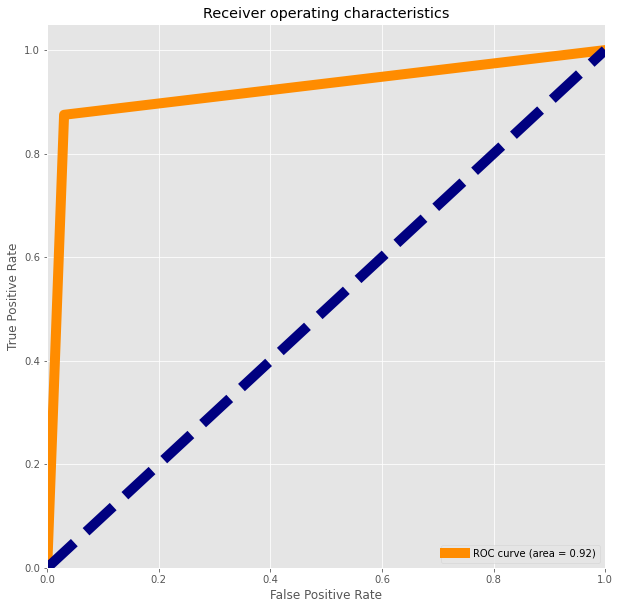

In [94]:
fpr,tpr,threshold=roc_curve(pred,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------

##### So far the best Algo. is the XGboost Classifier with Roc_Auc_Score: 93% 
##### so we will try to tune it to get better results via GridSearchCV.

-------------------------------------------------------------------------------------------------------------------------------

## Plotting ROC and compare AUC for all the models used

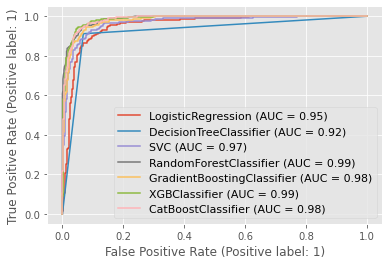

In [97]:
from sklearn.metrics import plot_roc_curve
disp=plot_roc_curve(lr, x_test_sc, y_test)   
plot_roc_curve(dtc, x_test_sc, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test_sc, y_test, ax=disp.ax_)
plot_roc_curve(rfc, x_test_sc, y_test, ax=disp.ax_)
plot_roc_curve(gbc, x_test_sc, y_test, ax=disp.ax_)
plot_roc_curve(xgb, x_test_sc, y_test, ax=disp.ax_)
plot_roc_curve(cbc, x_test_sc, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

#### Hyperparameter Tuning

In [98]:
xgb_params={ 'learning_rate':[0.001,0.01,0.1],'n_estimators':[100,300,500,700,1000],'max_depth':[3,4,5,6],'reg_lambda':[0.01,0.05,0.1,1.0],'subsample':[0.7,0.8,0.9]}
xgb_model=GridSearchCV(xgb,xgb_params,cv=9,n_jobs=-1,verbose=2).fit(x_train_sc,y_train)

Fitting 9 folds for each of 720 candidates, totalling 6480 fits


KeyboardInterrupt: 

## Hypertuning using Optuna 

In [99]:
def return_score(param):
    Model=xgboost.XGBClassifier(**param)
    score= np.mean(cross_val_score(Model,x_train_sc,y_train,cv=9,scoring='roc_auc',n_jobs=-1))
    return score

In [100]:
import optuna
from optuna import Trial,visualization
from optuna.samplers import TPESampler

In [101]:
def objective(trial):
    parameter={
        
        'learning_rate': trial.suggest_uniform('ourlearning_rate',0.001,0.3),
        'n_estimators': trial.suggest_int('estimators',300,2000),
        'subsample': trial.suggest_uniform('sample',0.4,0.9),
        'max_depth': trial.suggest_int('depth',3,20),
        'reg_alpha': trial.suggest_loguniform('alpha',1e-3,10.0),
        'reg_lambda': trial.suggest_loguniform('lambda',1e-3,10.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree',0.4,0.9),
        'gamma': trial.suggest_loguniform('ourgamma',1e-3,10.0),
        'mini_child_weight': trial.suggest_int('childweight',0,10)
    
    
    }    
    return(return_score(parameter))

In [103]:
study= optuna.create_study(direction='maximize',sampler=TPESampler())
study.optimize(objective,n_trials=100,n_jobs=-1)

[I 2022-12-22 14:07:18,017] A new study created in memory with name: no-name-6c44fa84-ec5e-4671-9485-ed24c08ab00a
[I 2022-12-22 14:08:04,423] Trial 2 finished with value: 0.9838810117283993 and parameters: {'ourlearning_rate': 0.07678244817522174, 'estimators': 1160, 'sample': 0.4138008075656336, 'depth': 5, 'alpha': 0.0023550452228534406, 'lambda': 0.005024105542657045, 'colsample_bytree': 0.8667950433709248, 'ourgamma': 0.005035177149514585, 'childweight': 6}. Best is trial 2 with value: 0.9838810117283993.
[I 2022-12-22 14:08:05,956] Trial 1 finished with value: 0.9724324703296305 and parameters: {'ourlearning_rate': 0.011551326885408747, 'estimators': 772, 'sample': 0.552700148688984, 'depth': 20, 'alpha': 0.02271673609059194, 'lambda': 4.773069095357481, 'colsample_bytree': 0.6180237597361653, 'ourgamma': 5.528703995669937, 'childweight': 0}. Best is trial 2 with value: 0.9838810117283993.
[I 2022-12-22 14:08:06,870] Trial 0 finished with value: 0.9721502691741141 and parameters: 

[I 2022-12-22 14:11:36,958] Trial 20 finished with value: 0.9846220496116946 and parameters: {'ourlearning_rate': 0.04846102473479954, 'estimators': 1904, 'sample': 0.647448945401123, 'depth': 10, 'alpha': 1.7673600378878545, 'lambda': 0.019367944477371887, 'colsample_bytree': 0.4192944866926102, 'ourgamma': 0.0010000900065076299, 'childweight': 3}. Best is trial 18 with value: 0.9860590646358968.
[I 2022-12-22 14:11:41,031] Trial 21 finished with value: 0.9849503354546951 and parameters: {'ourlearning_rate': 0.036594318441778004, 'estimators': 1968, 'sample': 0.6481973237715192, 'depth': 10, 'alpha': 1.7605188572847539, 'lambda': 0.023119021991659265, 'colsample_bytree': 0.42937899364062937, 'ourgamma': 0.016528541691102575, 'childweight': 2}. Best is trial 18 with value: 0.9860590646358968.
[I 2022-12-22 14:11:57,460] Trial 22 finished with value: 0.9774432775934455 and parameters: {'ourlearning_rate': 0.0027776511247206426, 'estimators': 1735, 'sample': 0.6252822801321484, 'depth': 

[I 2022-12-22 14:14:58,968] Trial 39 finished with value: 0.9852811673321327 and parameters: {'ourlearning_rate': 0.09243556422725643, 'estimators': 1587, 'sample': 0.7212863824279981, 'depth': 14, 'alpha': 0.1748487607983751, 'lambda': 0.050058309885728666, 'colsample_bytree': 0.6266132231364262, 'ourgamma': 0.005606896720436523, 'childweight': 6}. Best is trial 29 with value: 0.9864363231665938.
[I 2022-12-22 14:15:40,138] Trial 41 finished with value: 0.9842836339680385 and parameters: {'ourlearning_rate': 0.27804621911448235, 'estimators': 1813, 'sample': 0.5881713451485486, 'depth': 14, 'alpha': 0.18150930553904318, 'lambda': 0.003096482380493574, 'colsample_bytree': 0.5974678041068991, 'ourgamma': 0.004012507370927737, 'childweight': 7}. Best is trial 29 with value: 0.9864363231665938.
[I 2022-12-22 14:15:42,572] Trial 43 finished with value: 0.9859914377314148 and parameters: {'ourlearning_rate': 0.029999028951673896, 'estimators': 988, 'sample': 0.5809097142285344, 'depth': 14,

[I 2022-12-22 14:19:01,471] Trial 60 finished with value: 0.9856391378217526 and parameters: {'ourlearning_rate': 0.04477198676397645, 'estimators': 554, 'sample': 0.629778153791324, 'depth': 9, 'alpha': 0.032688821421842026, 'lambda': 0.7920228431560238, 'colsample_bytree': 0.5202152831566402, 'ourgamma': 0.0016523555035647963, 'childweight': 6}. Best is trial 29 with value: 0.9864363231665938.
[I 2022-12-22 14:19:19,148] Trial 61 finished with value: 0.9851388497011077 and parameters: {'ourlearning_rate': 0.10733090211541259, 'estimators': 1222, 'sample': 0.760488910194888, 'depth': 9, 'alpha': 0.02829024099983412, 'lambda': 0.007130782827170664, 'colsample_bytree': 0.5912096654287784, 'ourgamma': 0.011017978635755205, 'childweight': 6}. Best is trial 29 with value: 0.9864363231665938.
[I 2022-12-22 14:19:27,228] Trial 62 finished with value: 0.9860404793979358 and parameters: {'ourlearning_rate': 0.04344125130616527, 'estimators': 823, 'sample': 0.7457861942019195, 'depth': 9, 'alph

[I 2022-12-22 14:24:30,327] Trial 79 finished with value: 0.986029509487259 and parameters: {'ourlearning_rate': 0.0355418250398282, 'estimators': 1697, 'sample': 0.7423004948159349, 'depth': 14, 'alpha': 0.04336008673869138, 'lambda': 0.06205396103743731, 'colsample_bytree': 0.5641651724558157, 'ourgamma': 0.024407893029646344, 'childweight': 4}. Best is trial 29 with value: 0.9864363231665938.
[I 2022-12-22 14:24:31,228] Trial 80 finished with value: 0.985999589596819 and parameters: {'ourlearning_rate': 0.036305854547715614, 'estimators': 1635, 'sample': 0.7410483700510303, 'depth': 14, 'alpha': 0.36392537288669036, 'lambda': 0.05156631534478586, 'colsample_bytree': 0.5617041566545712, 'ourgamma': 0.002301511633012586, 'childweight': 4}. Best is trial 29 with value: 0.9864363231665938.
[I 2022-12-22 14:25:33,481] Trial 82 finished with value: 0.9853943085473102 and parameters: {'ourlearning_rate': 0.03428365044003001, 'estimators': 1842, 'sample': 0.7029516358234478, 'depth': 11, 'a

In [104]:
optuna.visualization.plot_slice(study)

<AxesSubplot:title={'center':'Optimization History Plot'}, xlabel='Trial', ylabel='Objective Value'>

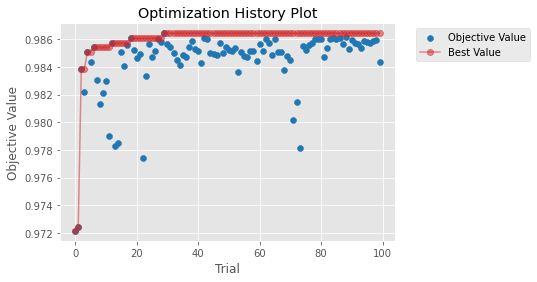

In [105]:
optuna.visualization.matplotlib.plot_optimization_history(study)

In [106]:
study.best_params

{'ourlearning_rate': 0.02740649664125911,
 'estimators': 1482,
 'sample': 0.7168154486322253,
 'depth': 12,
 'alpha': 0.07091915455770818,
 'lambda': 0.008725063127118512,
 'colsample_bytree': 0.5544944241528172,
 'ourgamma': 0.002819283858894669,
 'childweight': 6}

In [107]:
xgb_optuna=xgboost.XGBClassifier(learning_rate= 0.02740649664125911,n_estimators= 1482,subsample= 0.7168154486322253
                                 ,max_depth=12,min_child_weight=6,reg_alpha= 0.07091915455770818,
                                 reg_lambda= 0.008725063127118512,colsample_bytree=  0.5544944241528172,
                                 gamma= 0.002819283858894669).fit(x_train_sc,y_train)

In [108]:
train_pred= xgb_optuna.predict(x_train_sc)
test_pred = xgb_optuna.predict(x_test_sc)

In [109]:
print('ROC_AUC_Train: ', roc_auc_score(y_train, train_pred))
print('--------------------------------------------------------------------')
print('ROC_AUC_Test: ', roc_auc_score(y_test, test_pred))

ROC_AUC_Train:  0.9971184212715686
--------------------------------------------------------------------
ROC_AUC_Test:  0.9451448278370074


In [111]:
print(confusion_matrix(y_test, test_pred))

[[552  31]
 [ 16 267]]


In [112]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       583
           1       0.90      0.94      0.92       283

    accuracy                           0.95       866
   macro avg       0.93      0.95      0.94       866
weighted avg       0.95      0.95      0.95       866



-------------------------------------------------------------------------------------------------------------------------------

## Save Model

In [113]:
#Saving the model using .pkl
import joblib
joblib.dump(xgb_optuna,"Wine_study.pkl")

['Wine_study.pkl']

In [114]:
#Loading the saved model
aa=joblib.load("Wine_study.pkl")

In [115]:
#Prediction
prediction = aa.predict(x_test_sc)
prediction

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,

In [116]:

pd.DataFrame([aa.predict(x_test_sc)[:],y_test[:]],index=["Predicted","Original"])

0    1    2    3    4    5    6    7    8    9    ...  856  857  \
Predicted    1    0    1    0    0    1    0    0    0    0  ...    0    0   
Original     1    0    0    0    0    1    0    0    0    0  ...    0    0   

           858  859  860  861  862  863  864  865  
Predicted    1    1    1    1    0    1    0    0  
Original     1    1    1    0    0    1    0    0  

[2 rows x 866 columns]

### Done with Pleasure